**1. Importing libraries**

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import optlib.optical as opt
import os
import scipy

np.seterr(divide='ignore', invalid='ignore')

plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams['font.size'] = 14
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

%matplotlib notebook

**2. Path to the directory containing Henke ionisation data (download from https://henke.lbl.gov/optical_constants/asf.html)**

In [2]:
xraypath = '/Users/olgaridzel/Research/optical-data-fit/sf/'

**Cu**

In [3]:
A = [64, 6, 6.5, 5.5, 4, 55, 42, 172, 80, 240, 90, 85, 200, 500]
gamma = [0.3, 0.3, 0.65, 0.7, 0.7, 2.6, 4.76, 10.18, 8, 32, 30, 30, 45, 65]
omega = [0.01, 0.3, 2.5, 3.1, 3.7, 5.05, 8.93, 14.74, 25.6, 40, 55, 65, 83, 120]
alpha = 1

# A = [64.136, 4.021, 5.227, 7.205, 3.121, 45.887, 54.131, 112.625, 74.809, 181.866, 103.747, 90.476, 176.331]
# gamma = [0.228, 0.242, 0.556, 0.721, 0.849, 2.518, 6.923, 14.037, 7.539, 17.087, 17.53, 23.264, 22.979]
# omega = [0.008, 0.258, 2.333, 2.346, 2.71, 4.97, 13.181, 14.929, 6.849, 26.762, 53.702, 47.263, 60.59]
# alpha = 0.8247437662473325

M = 63.546 # Molar weight
rho = 8.92 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = alpha)
composition = opt.Composition(['cu'], [1])
eloss = opt.linspace(0,100,0.1)
q = 0

cu_drude = opt.Material('Cu', oscillators, composition, eloss, q, xraypath)
cu_drude.Eg = 0
cu_drude.Ef = 8.7
cu_drude.atomic_density = rho * opt.N_Avogadro / M *1e-24
cu_drude.static_refractive_index = 0.63660
cu_drude.Z = 29
cu_drude.use_henke_for_ne = True
cu_drude.use_KK_constraint = False

fsum = cu_drude.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(cu_drude.Z))

kksum = cu_drude.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 28.319063072354346
Z = 29
KKSum = 1.0109727992048054


In [4]:
n_in = 100
E0 = 5000

In [5]:
mu_i = np.cos(np.deg2rad(0))
mu_o = np.cos(np.deg2rad(45))

# cu_drude.calculateElasticProperties(E0)
# cu_drude.calculateLegendreCoefficients(100)
cu_drude.calculate(E0, n_in, 200, mu_i, mu_o)
# cu_drude.calculatePartialIntensities(mu_o, n_in)

45.0
8


<IPython.core.display.Javascript object>


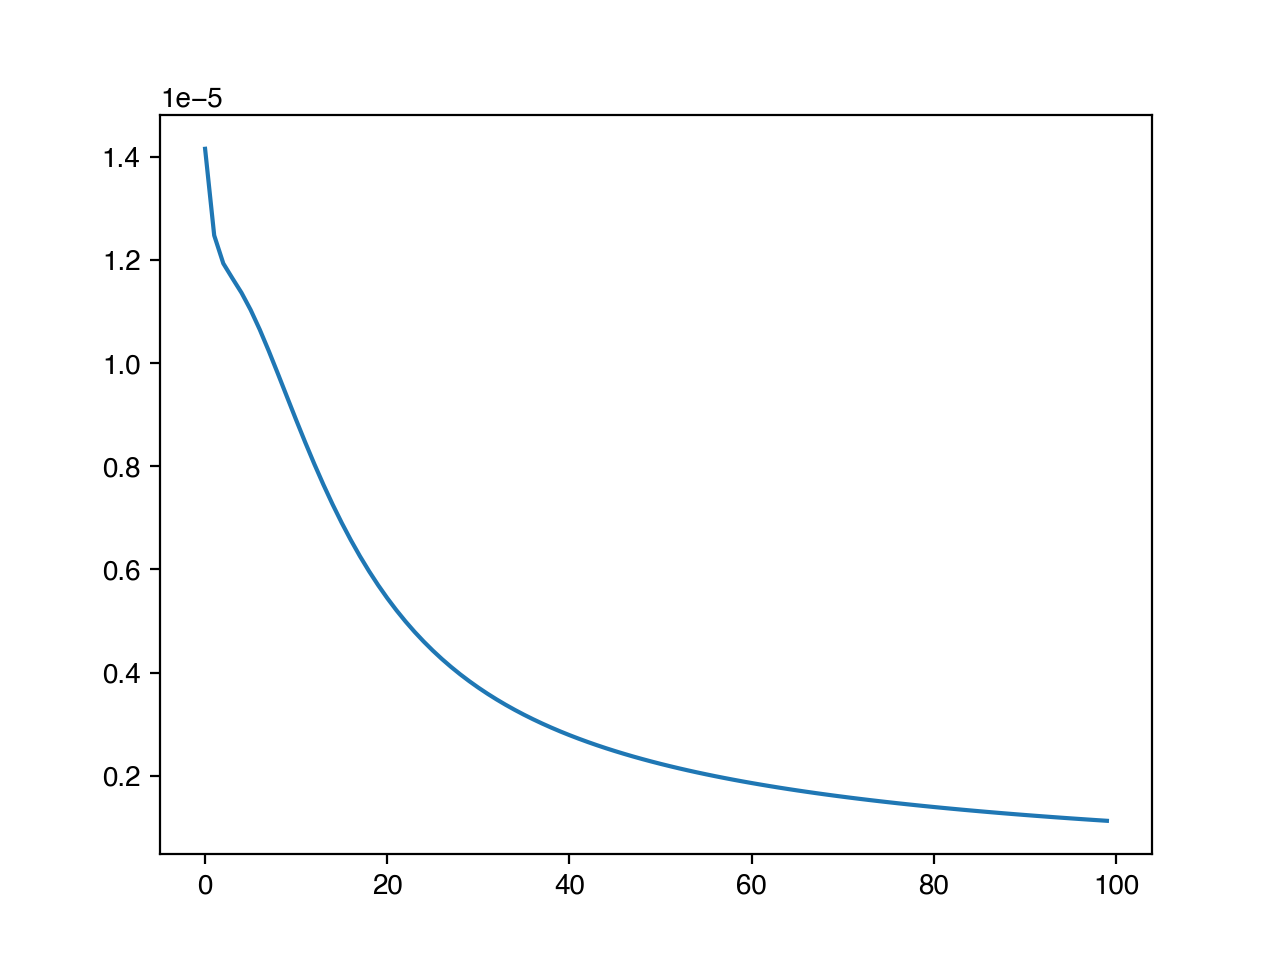

In [6]:
# mu_o = np.cos(np.deg2rad(0))
# cu_drude.calculatePartialIntensities(mu_o, n_in)

plt.figure()
# plt.plot(cu_drude.xl)
# plt.plot(xl)
plt.plot(cu_drude.partial_intensities)
# plt.plot(cu_drude.angular_distribution[:,0])
# plt.plot(cu_drude.R_m[1,:,0,0]*2*math.pi)
# plt.ylim(0,0.014)
# plt.xlim(0,100)
plt.show()

In [7]:
cu_drude.calculateEnergyDistribution(E0,n_in)

<IPython.core.display.Javascript object>


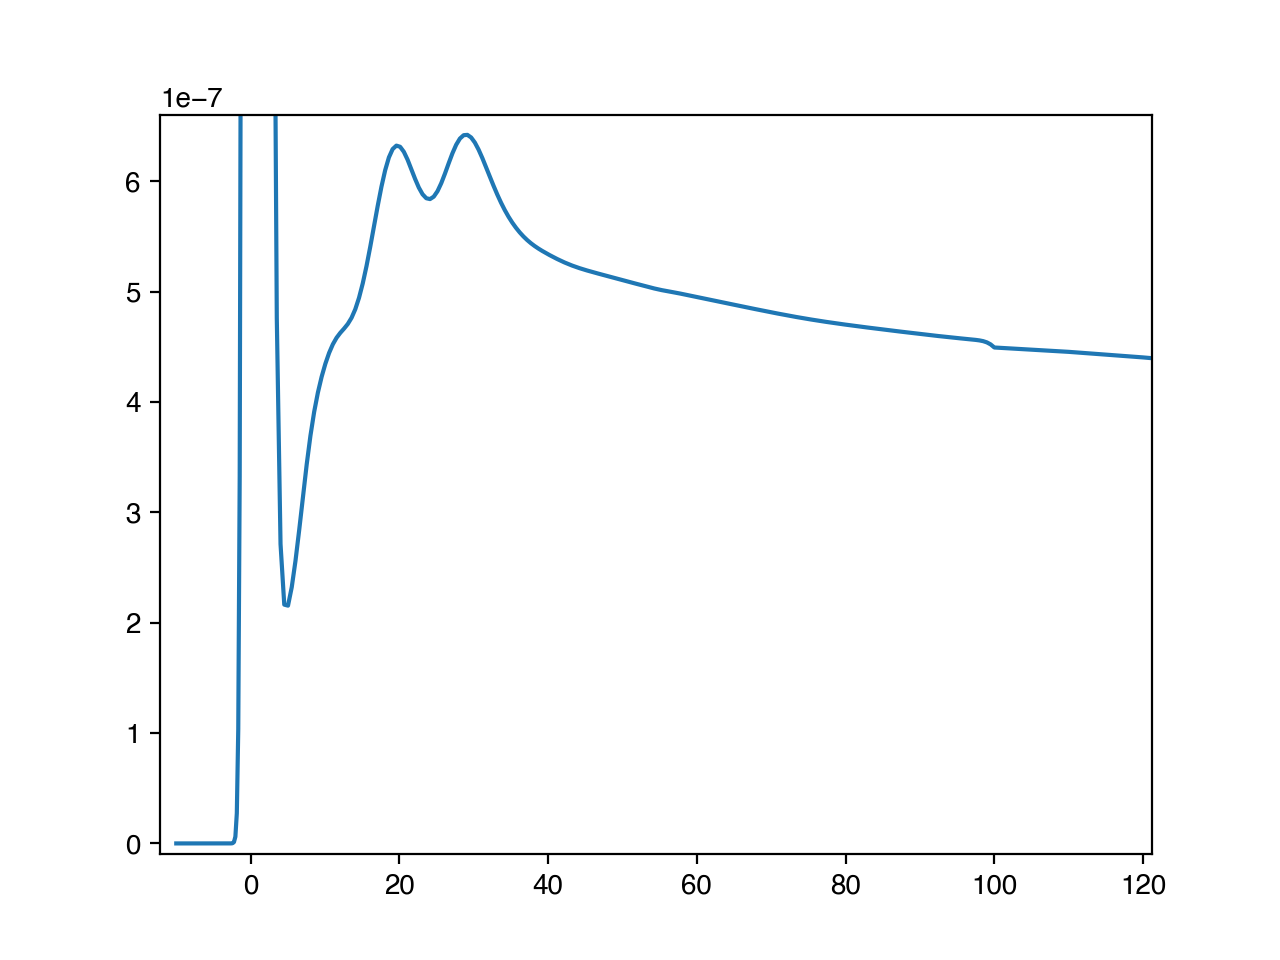

In [8]:
plt.figure()
plt.plot(cu_drude.spectrum_E, cu_drude.spectrum)
plt.show()

Starting optimisation...
Electron density = 0.6697944019790132
found minimum after 1155 evaluations
minimum value =  0.0026161024378544093
result code =  4
FSum = 28.05860502136037
Z = 29
KKSum = 1.0375282641632368
A = [64.02, 4.032, 5.218, 7.151, 3.131, 45.901, 54.006, 112.628, 75.243, 181.629, 103.891, 90.366, 176.356]
gamma = [0.228, 0.244, 0.558, 0.853, 0.829, 2.675, 6.921, 14.017, 7.509, 17.095, 17.517, 23.196, 22.849]
omega = [0.008, 0.257, 2.917, 2.495, 2.702, 4.968, 13.166, 14.903, 6.864, 26.784, 53.712, 47.289, 60.73]
alpha = 0.8247421927681764


<IPython.core.display.Javascript object>


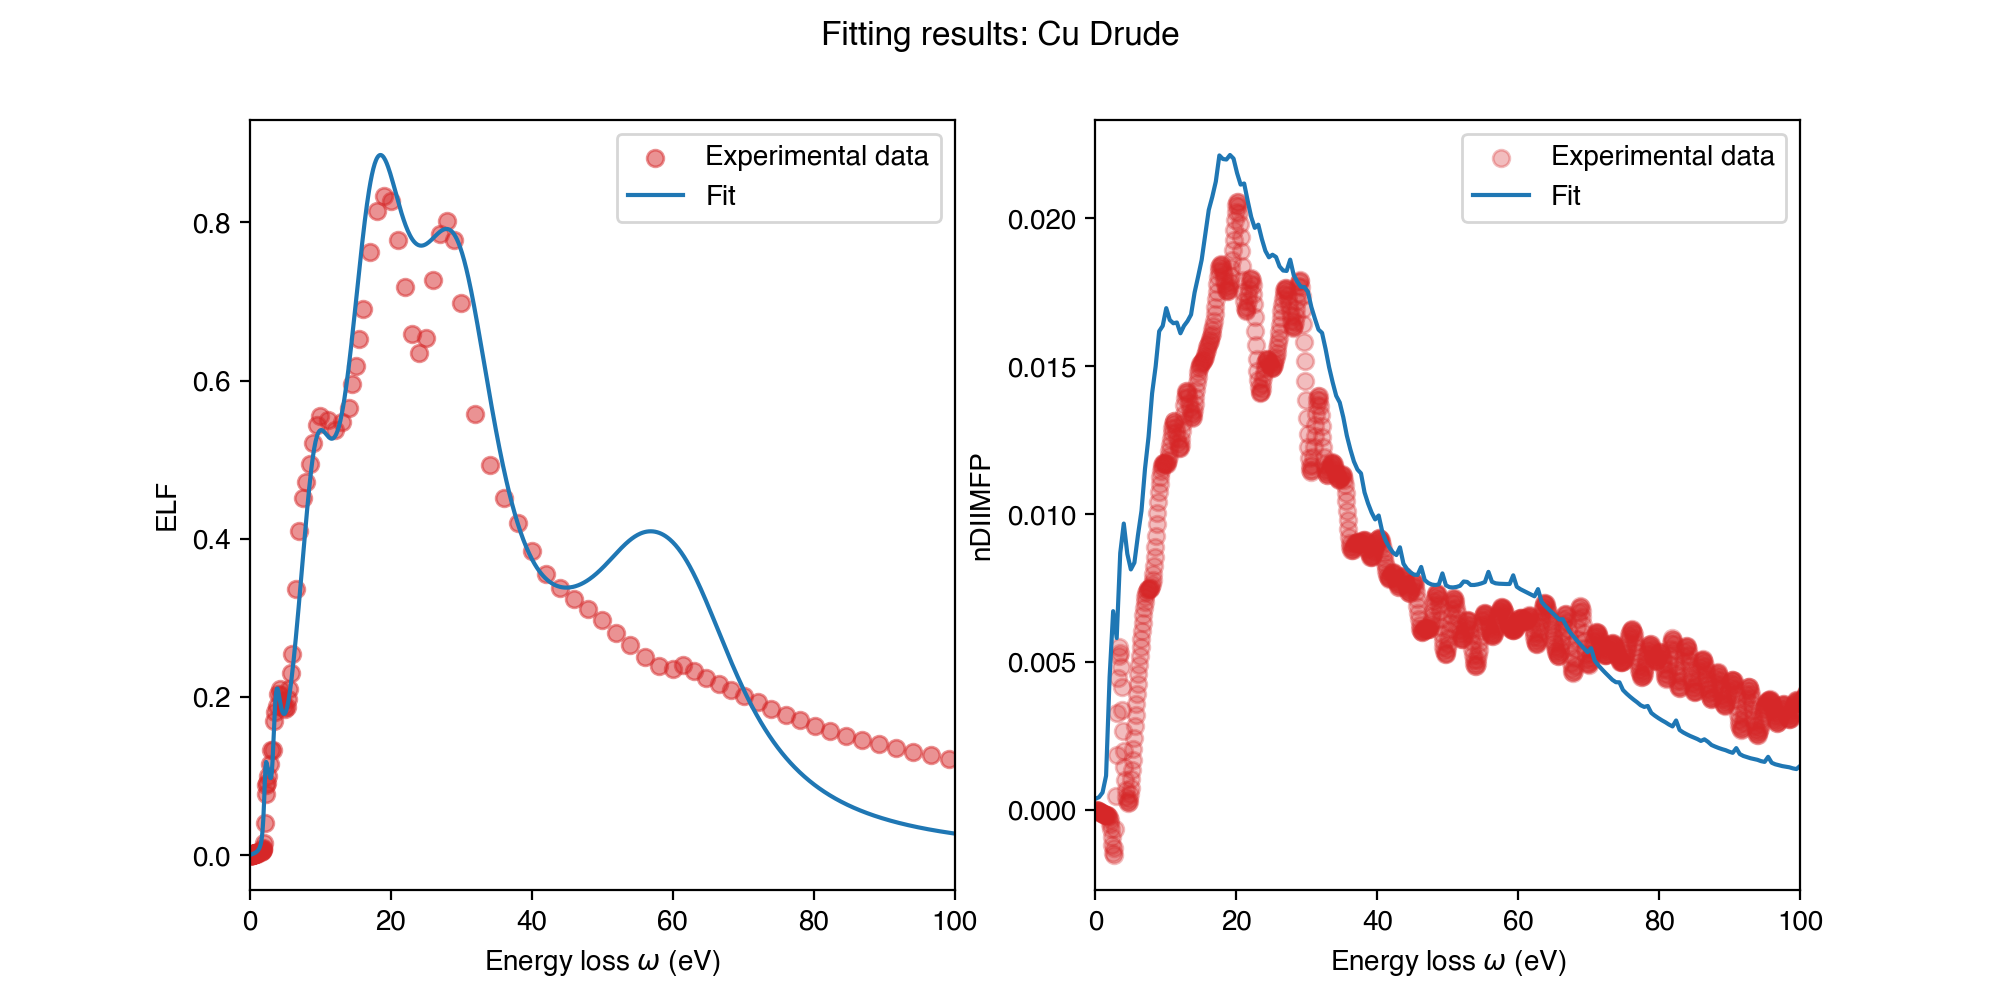

In [4]:
E0 = 3400

fd = np.loadtxt('/Users/olgaridzel/Research/PHYSDAT/opt/pal/cu.diel')
x_exp_elf = fd[:,0]
y_exp_elf = fd[:,3]

exp_data = np.loadtxt('/Users/olgaridzel/Research/olga-optical-data/MATLAB/diimfp/wolga/cu.wo', usecols = (0,1,2))
x_exp_ndiimfp = exp_data[:,0]
y_exp_ndiimfp = exp_data[:,1]

exp_data = opt.exp_data()
exp_data.x_elf = x_exp_elf
exp_data.y_elf = y_exp_elf
exp_data.x_ndiimfp = x_exp_ndiimfp
exp_data.y_ndiimfp = y_exp_ndiimfp

opt_ = opt.OptFit(cu_drude, exp_data, E0, n_q = 10)
result = opt_.runOptimisation(1, 0, maxeval = 10000, xtol_rel = 1e-4, isGlobal = False)
oscOptimised = opt_.vec2Struct(result)

# opt_ = opt.OptFit(oscOptimised, exp_data, E0, n_q = 10)
# result = opt_.runOptimisation(0.95, 0.05, maxeval = 1000, xtol_rel = 1e-4, isGlobal = False)
# oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')
print(f'alpha = {oscOptimised.oscillators.alpha}')
# print()
# print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
# print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
# print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

# oscOptimised = cu_drude
oscOptimised.calculateELF()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axs[0].scatter(exp_data.x_elf,exp_data.y_elf,label='Experimental data', c='tab:red', alpha = 0.5)
axs[0].plot(oscOptimised.eloss,oscOptimised.ELF,label='Fit')
axs[0].set_xlabel('Energy loss $\omega$ (eV)')
axs[0].set_ylabel('ELF')
axs[0].legend()
axs[0].set_xlim(0,100)

oscOptimised.calculateDIIMFP(E0)
axs[1].scatter(exp_data.x_ndiimfp,exp_data.y_ndiimfp,label='Experimental data', c='tab:red', alpha = 0.3)
axs[1].plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
axs[1].set_xlabel('Energy loss $\omega$ (eV)')
axs[1].set_ylabel('nDIIMFP')
axs[1].legend()
axs[1].set_xlim(0,100)

fig.suptitle(f'Fitting results: {oscOptimised.name} {oscOptimised.oscillators.model}')
plt.show()

In [5]:
A = [86.3, 19.8, 21.9, 30.2, 2.5, 157.7, 130.9, 108.6, 40, 1022.4]
gamma = [0.027, 0.5, 0.5, 1.7, 0.5, 11.3, 10.1, 68.2, 3, 55.1]
omega = [0, 1, 1, 4, 4.8, 7.2, 14.2, 16.9, 24.3, 59.4]
alpha = 1

M = 63.546 # Molar weight
rho = 8.92 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = alpha)
composition = opt.Composition(['cu'], [1])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

cu_drude_lorenz = opt.Material('Cu', oscillators, composition, eloss, q, xraypath)
cu_drude_lorenz.Eg = 0
cu_drude_lorenz.Ef = 8.7
cu_drude_lorenz.atomic_density = rho * opt.N_Avogadro / M *1e-24
cu_drude_lorenz.static_refractive_index = 0.63660
cu_drude_lorenz.Z = 29
cu_drude_lorenz.use_henke_for_ne = True
cu_drude_lorenz.use_KK_constraint = True

fsum = cu_drude_lorenz.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(cu_drude_lorenz.Z))

kksum = cu_drude_lorenz.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 30.427905838669798
Z = 29
KKSum = 1.0212980597703276


Starting optimisation...
Electron density = 0.6697944019790132
found minimum after 10000 evaluations
minimum value =  0.012797545711227744
result code =  5
FSum = 26.001932772233918
Z = 29
KKSum = 0.9743932446967492
A = [52.863, 18.401, 18.699, 37.202, 3.019, 103.788, 123.434, 98.858, 44.239, 423.068]
gamma = [0.027, 0.848, 0.938, 2.883, 0.489, 21.903, 11.516, 94.426, 5.406, 83.168]
omega = [118.615, 1.888, 1.804, 4.752, 5.286, 5.415, 13.618, 17.995, 26.068, 44.012]
alpha = 0.7330999846704133


<IPython.core.display.Javascript object>


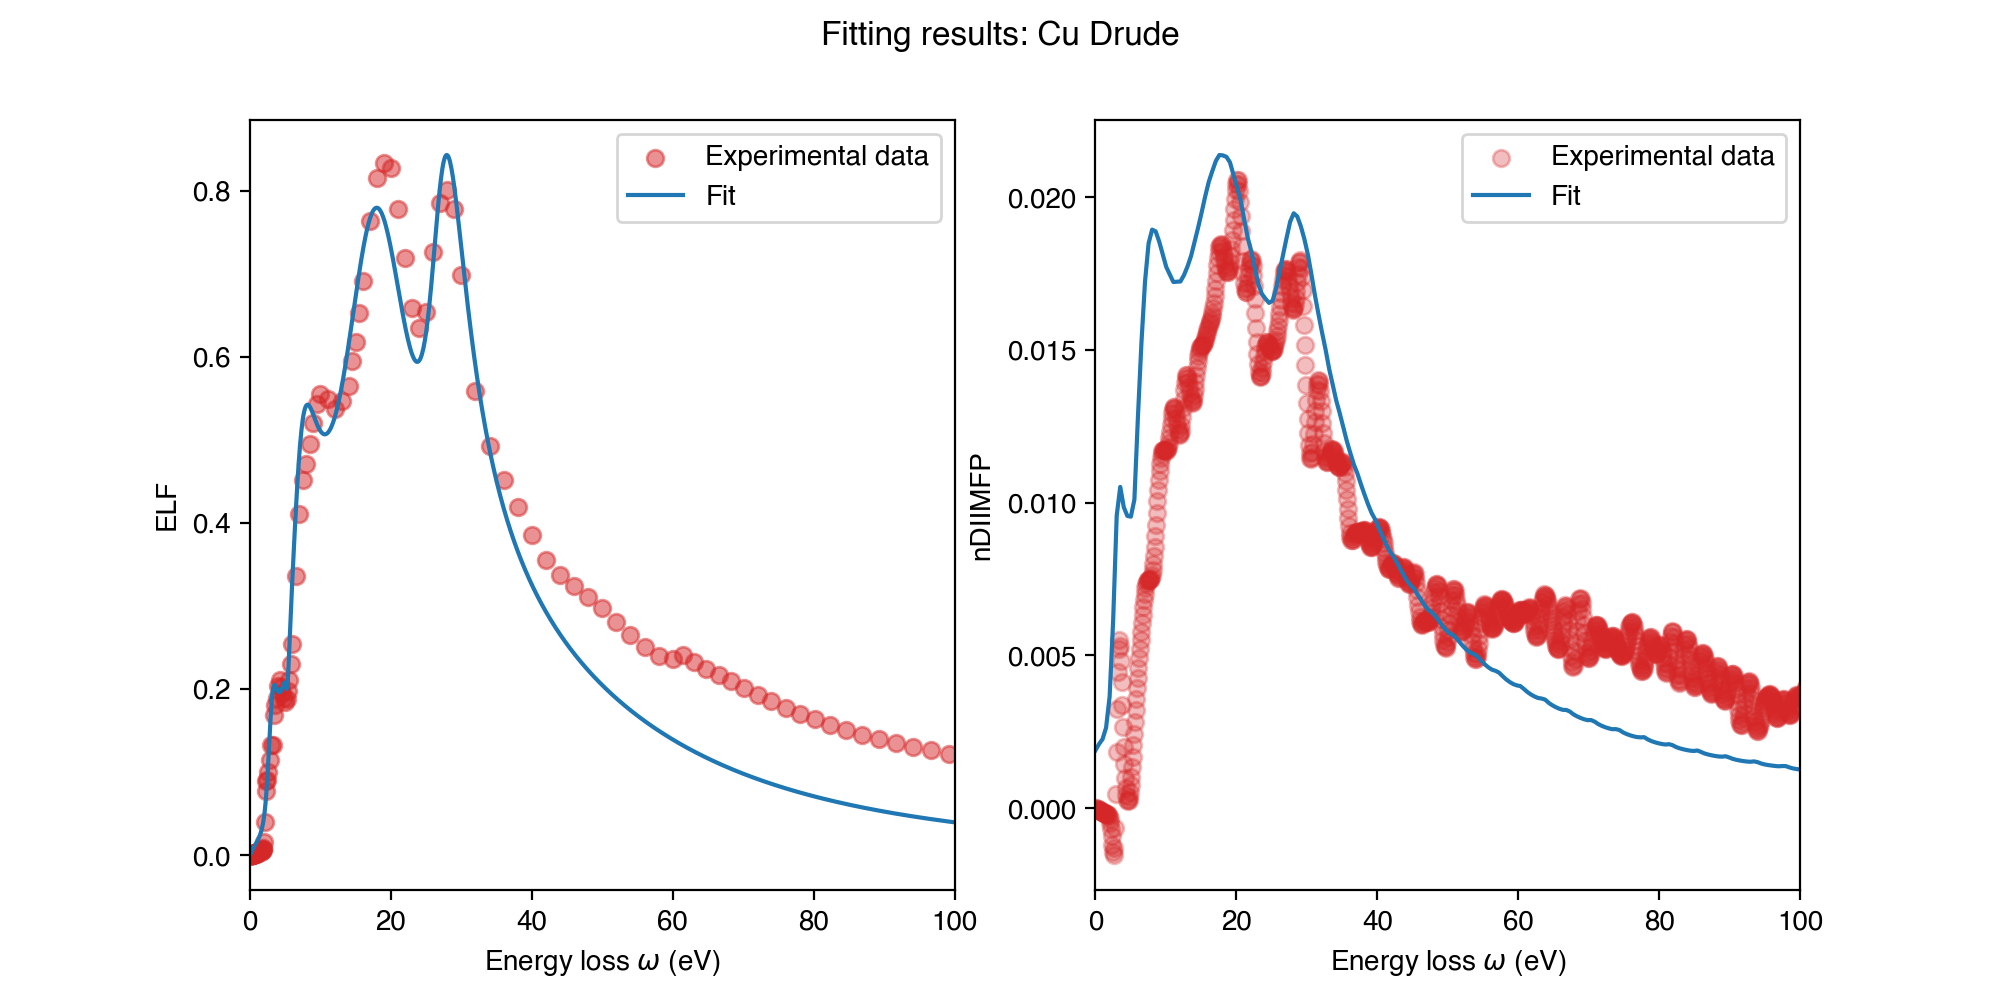

In [9]:
E0 = 3400

fd = np.loadtxt('/Users/olgaridzel/Research/PHYSDAT/opt/pal/cu.diel')
x_exp_elf = fd[:,0]
y_exp_elf = fd[:,3]

exp_data = np.loadtxt('/Users/olgaridzel/Research/olga-optical-data/MATLAB/diimfp/wolga/cu.wo', usecols = (0,1,2))
x_exp_ndiimfp = exp_data[:,0]
y_exp_ndiimfp = exp_data[:,1]

exp_data = opt.exp_data()
exp_data.x_elf = x_exp_elf
exp_data.y_elf = y_exp_elf
exp_data.x_ndiimfp = x_exp_ndiimfp
exp_data.y_ndiimfp = y_exp_ndiimfp

opt_ = opt.OptFit(cu_drude_lorenz, exp_data, E0, n_q = 10)
result = opt_.runOptimisation(0.7, 0.3, maxeval = 10000, xtol_rel = 1e-7, isGlobal = False)
oscOptimised = opt_.vec2Struct(result)

# opt_ = opt.OptFit(oscOptimised, exp_data, E0, n_q = 10)
# result = opt_.runOptimisation(1, 0.0, maxeval = 1000, xtol_rel = 1e-4, isGlobal = False)
# oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')
print(f'alpha = {oscOptimised.oscillators.alpha}')
# print()
# print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
# print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
# print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

# oscOptimised = cu_drude
oscOptimised.calculateELF()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axs[0].scatter(exp_data.x_elf,exp_data.y_elf,label='Experimental data', c='tab:red', alpha = 0.5)
axs[0].plot(oscOptimised.eloss,oscOptimised.ELF,label='Fit')
axs[0].set_xlabel('Energy loss $\omega$ (eV)')
axs[0].set_ylabel('ELF')
axs[0].legend()
axs[0].set_xlim(0,100)

oscOptimised.calculateDIIMFP(E0)
axs[1].scatter(exp_data.x_ndiimfp,exp_data.y_ndiimfp,label='Experimental data', c='tab:red', alpha = 0.3)
axs[1].plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
axs[1].set_xlabel('Energy loss $\omega$ (eV)')
axs[1].set_ylabel('nDIIMFP')
axs[1].legend()
axs[1].set_xlim(0,100)

fig.suptitle(f'Fitting results: {oscOptimised.name} {oscOptimised.oscillators.model}')
plt.show()

In [104]:
A = [0.01, 0.02, 0.06, 0.11, 0.38, 0.15, 0.07, 0.05, 0.08, 0.1]
gamma = [0.69, 0.8, 2.36, 6.59, 10.82, 4.89, 40.77, 19.15, 14.12, 161.76]
omega = [3.46, 4.2, 7.54, 28.34, 19.39, 10.48, 66.56, 47.52, 36.14, 126.04]

M = 63.546 # Molar weight
rho = 8.96 # g/cm3

oscillators = opt.Oscillators('Mermin', A, gamma, omega, alpha = 0)
composition = opt.Composition(['cu'], [1])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0.01

cu_m = opt.Material('Cu', oscillators, composition, eloss, q, xraypath)
cu_m.Eg = 0
cu_m.Ef = 8.7
cu_m.atomic_density = rho * opt.N_Avogadro / M *1e-24
cu_m.static_refractive_index = 0.63660
cu_m.Z = 29
cu_m.use_henke_for_ne = True
cu_m.use_KK_constraint = False
cu_m.use_kk_relation = False

fsum = cu_m.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(cu_m.Z))

kksum = cu_m.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 28.26767093572482
Z = 29
KKSum = 1.030928759550817


Start optimisation
Electron density = 0.6697944019790132
FSum = 27.055386678648112
Z = 29
KKSum = 1.016907362648181
A = [54.295, 17.403, 45.489, 27.64, 5.645, 63.441, 119.789, 198.956, 35.836, 355.159]
gamma = [0.028, 0.597, 0.587, 3.009, 0.513, 7.332, 8.128, 88.104, 3.914, 43.844]
omega = [4.975, 1.41, 1.043, 3.727, 3.694, 8.571, 13.78, 35.223, 23.718, 45.567]
osc.A = [54.295 17.403 45.489 27.64 5.645 63.441 119.789 198.956 35.836 355.159];
osc.G = [0.028 0.597 0.587 3.009 0.513 7.332 8.128 88.104 3.914 43.844];
osc.Om = [4.975 1.41 1.043 3.727 3.694 8.571 13.78 35.223 23.718 45.567];


<IPython.core.display.Javascript object>


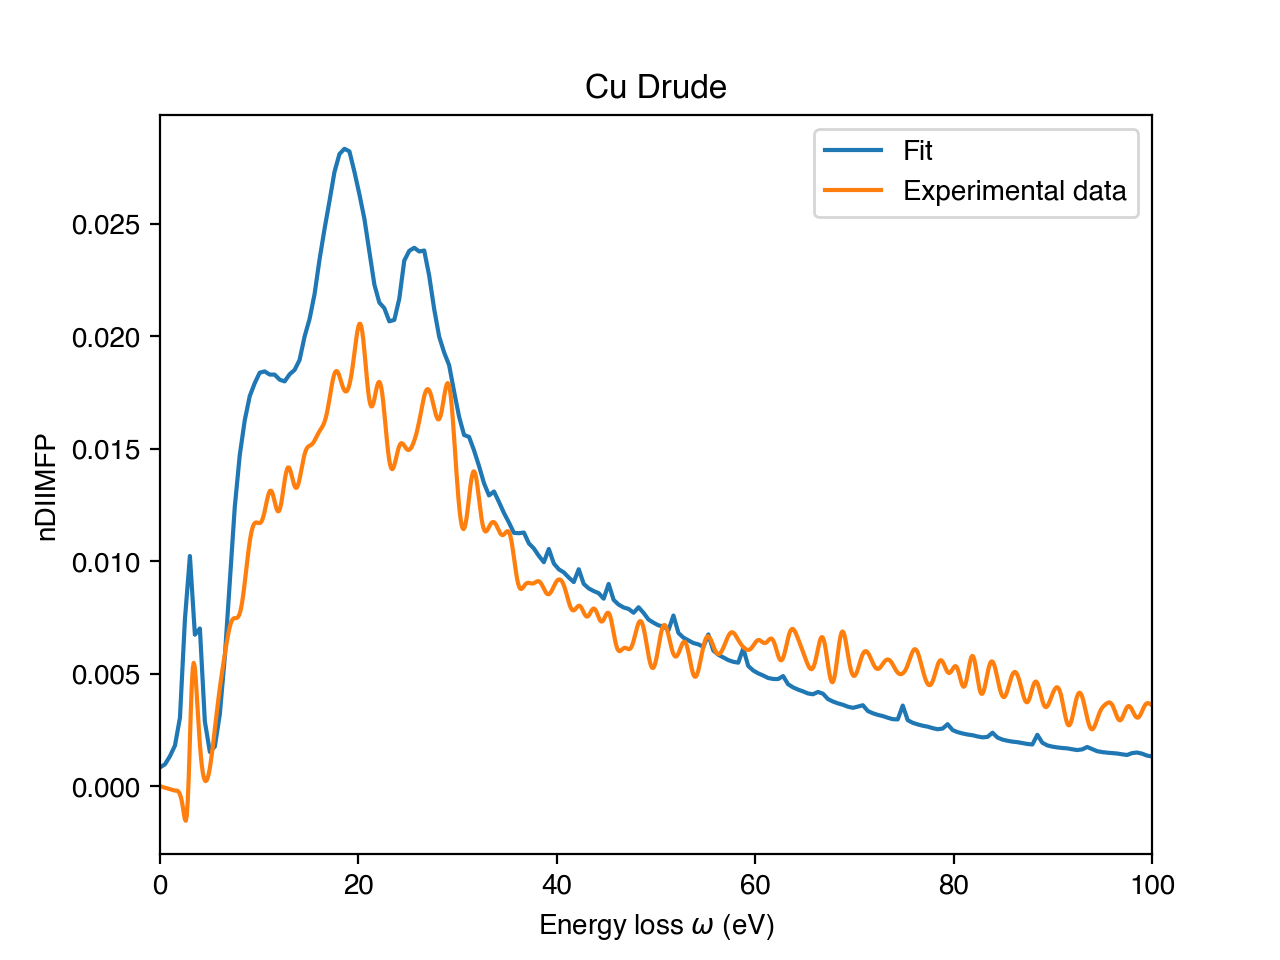

In [9]:
exp_data = np.loadtxt('/Users/olgaridzel/Research/olga-optical-data/MATLAB/diimfp/wolga/cu.wo', usecols = (0,1,2))
x_exp = exp_data[:,0]
y_exp = exp_data[:,1]

opt_ = opt.OptFit(cu_drude_lorenz, x_exp, y_exp, 3400)
result = opt_.runOptimisation('ndiimfp', maxeval = 500, xtol_rel = 1e-10)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

# oscOptimised = cu_drude_lorenz
oscOptimised.calculateDIIMFP(3400)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('nDIIMFP')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

Metal Ef = 8.7
rel_coef 1.009991315125679
Metal Ef = 8.7
rel_coef 1.009991315125679
Metal Ef = 8.7
rel_coef 1.009991315125679


<IPython.core.display.Javascript object>


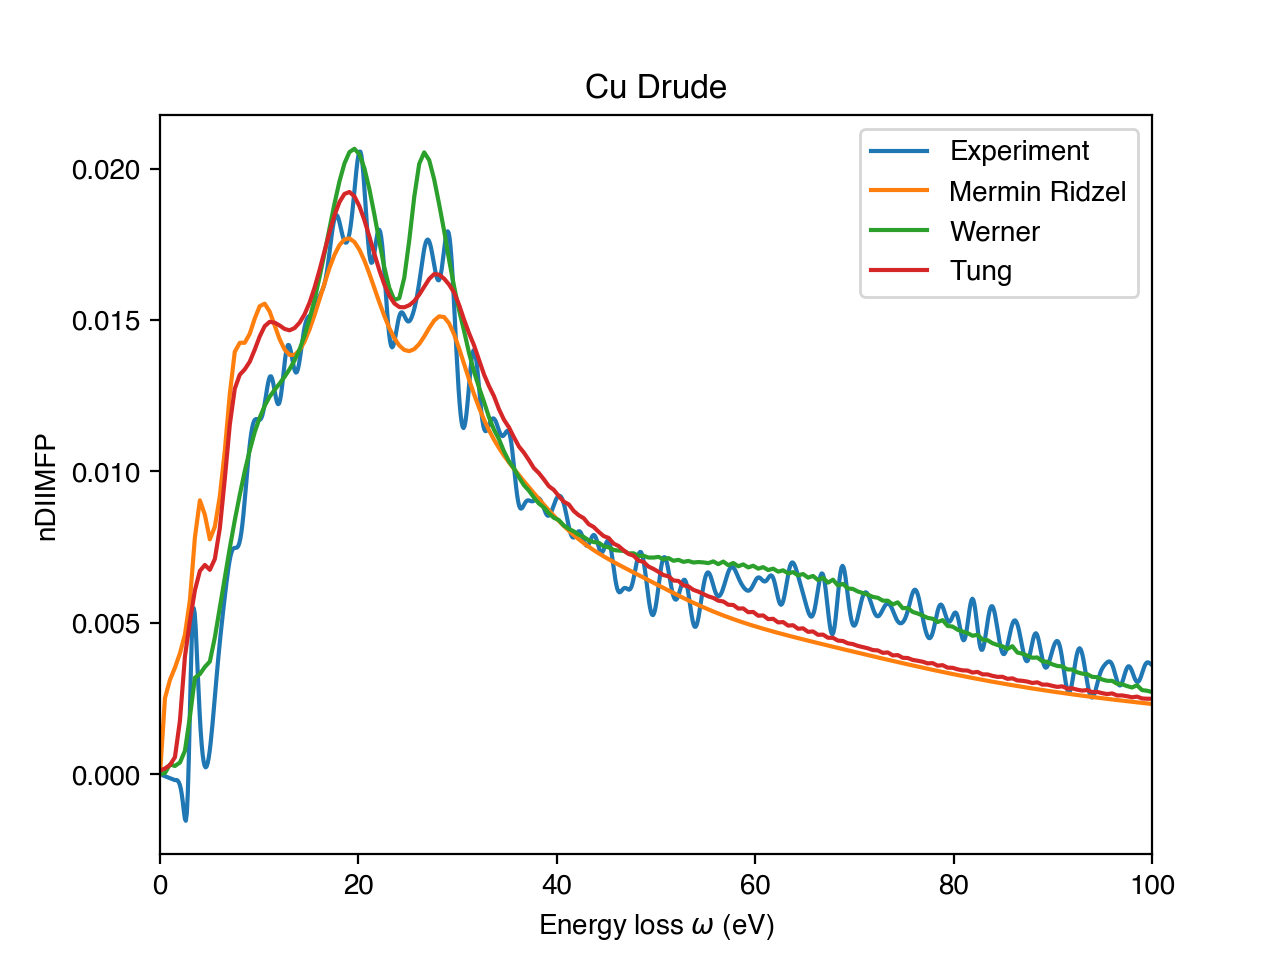

In [105]:
exp_data = np.loadtxt('/Users/olgaridzel/Research/olga-optical-data/MATLAB/diimfp/wolga/cu.wo', usecols = (0,1,2,3,4,5))

cu_m.calculateDIIMFP(3400, 0.5, 10)
cu_drude_lorenz.calculateDIIMFP(3400, 0.5, 12)
cu_drude.calculateDIIMFP(3400, 0.5, 12)

plt.figure()
plt.plot(exp_data[:,0], exp_data[:,1], label='Experiment')
plt.plot(cu_m.DIIMFP_E,cu_m.DIIMFP,label='Mermin Ridzel')
plt.plot(cu_drude_lorenz.DIIMFP_E,cu_drude_lorenz.DIIMFP,label='Werner')
plt.plot(cu_drude.DIIMFP_E,cu_drude.DIIMFP,label='Tung')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('nDIIMFP')
plt.title(f'{cu_drude.name} {cu_drude.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [ ]:
plt.figure()

q_list = opt.linspace(0, 2, 1)
for q in q_list:
    cu_drude.q = q
    cu_drude.calculateELF()
    plt.plot(cu_drude.eloss, cu_drude.ELF)
    
plt.show()

<IPython.core.display.Javascript object>


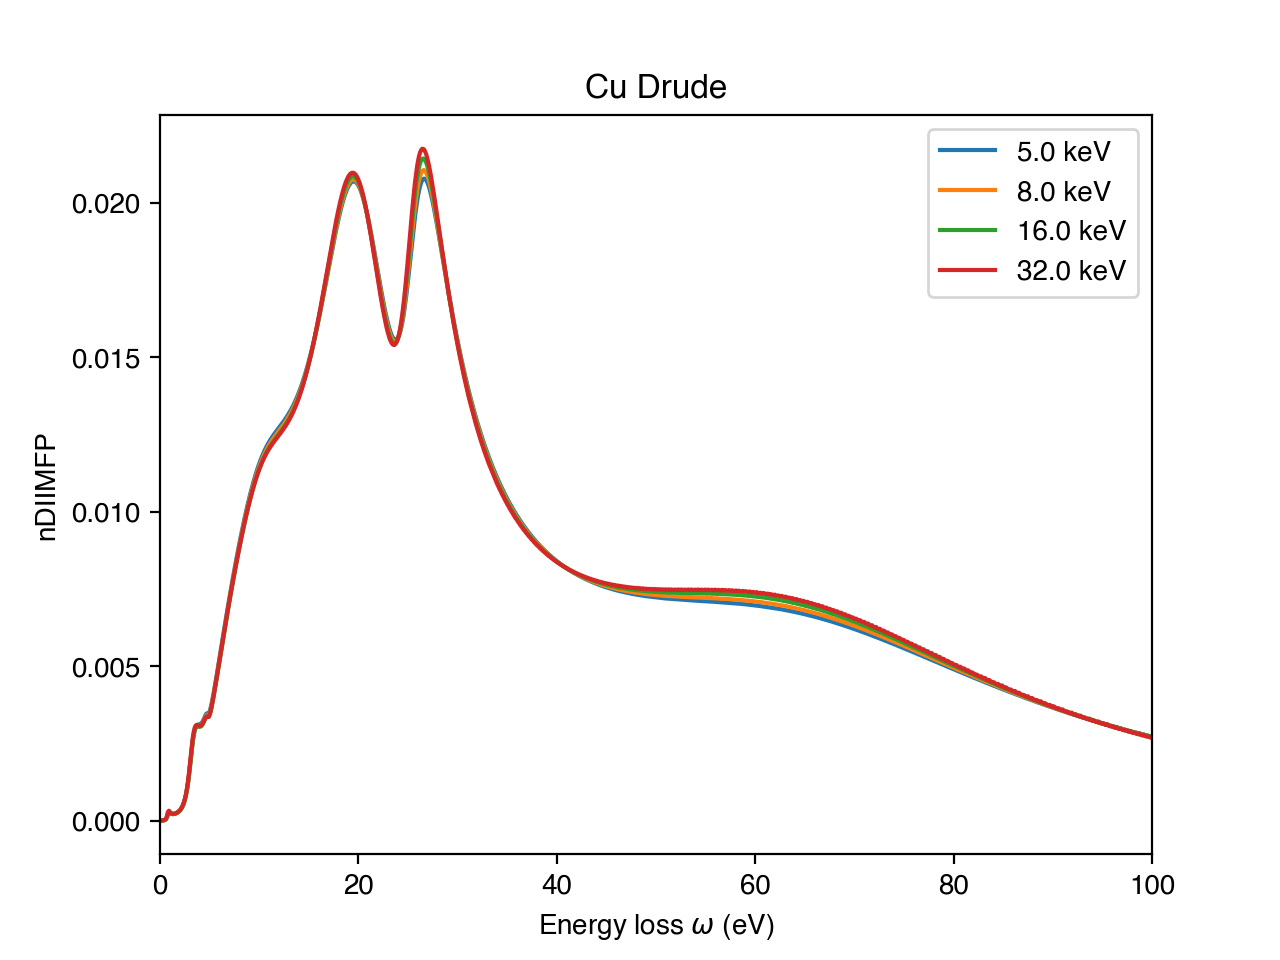

Metal Ef = 8.7
rel_coef 1.014700706979456
Metal Ef = 8.7
rel_coef 1.0235438188918027
Metal Ef = 8.7
rel_coef 1.0472073567140316
Metal Ef = 8.7
rel_coef 1.094882685113485


In [79]:
E = [5000, 8000, 16000, 32000]

plt.figure()

for energy in E:
    cu_drude_lorenz.calculateDIIMFP(energy, 0.1, 15)

    fd = open(f'Cu/cu_{energy}.ndiimfp', 'w')

    for i in range(len(cu_drude_lorenz.DIIMFP_E)):
        fd.write(f'{cu_drude_lorenz.DIIMFP_E[i]:.4f} {cu_drude_lorenz.DIIMFP[i]:.4f}\n')

    plt.plot(cu_drude_lorenz.DIIMFP_E, cu_drude_lorenz.DIIMFP, label=f'{energy/1000} keV')
    

fd.close()
plt.xlim(0, 100)
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('nDIIMFP')
plt.title(f'{cu_drude_lorenz.name} {cu_drude_lorenz.oscillators.model}')
plt.show()
plt.legend()

plt.savefig(f'Cu/{cu_drude_lorenz.name}_{cu_drude_lorenz.oscillators.model}_ndiimfps.png', dpi=600)

**Al**

In [3]:
# diimfp fit with alpha = 1 as initial
# A = [131.016, 60.718, 109.935]
# gamma = [0.919, 99.059, 48.391]
# omega = [10.028, 48.137, 43.035]
# alpha = 0.99

# diimfp fit with alpha = 0 as initial
A = [111.679, 97.146, 92.833]
gamma = [0.796, 98.962, 50.909]
omega = [10.945, 56.767, 33.395]
alpha = 0.09663535221663536

M = 26.981538 # Molar weight
rho = 2.70 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = alpha)
composition = opt.Composition(['al'], [1])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

al_drude = opt.Material('Al', oscillators, composition, eloss, q, xraypath)
al_drude.Eg = 0
al_drude.Ef = 11.36
al_drude.atomic_density = rho * opt.N_Avogadro / M *1e-24
al_drude.static_refractive_index = 1.1563
al_drude.Z = 13
al_drude.use_henke_for_ne = True
al_drude.use_KK_constraint = True

fsum = al_drude.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(al_drude.Z))

kksum = al_drude.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 11.962685125975376
Z = 13
KKSum = 0.5296300305570234


In [4]:
n_in = 100
E0 = 5000
al_drude.calculateDIIMFP(E0, decdigs=13)
convs = al_drude.calculateDiimfpConvolutions(n_in)

In [5]:
al_drude.calculateElasticProperties()

    
E (eV)=  5.0000000E+03
 i=   2,   r= 6.12912E-07,   r*Wabs=  0.00000E+00
 i=   3,   r= 1.23890E-06,   r*Wabs= -1.00079E-07
 i=   4,   r= 1.87825E-06,   r*Wabs= -7.88016E-05
 i=   5,   r= 2.53125E-06,   r*Wabs= -1.16406E-04
 i=   6,   r= 3.19818E-06,   r*Wabs= -1.40127E-04
 i=   7,   r= 3.87934E-06,   r*Wabs= -1.59546E-04
 i=   8,   r= 4.57503E-06,   r*Wabs= -1.76743E-04
 i=   9,   r= 5.28558E-06,   r*Wabs= -1.92527E-04
 i=  10,   r= 6.01128E-06,   r*Wabs= -2.07303E-04
 i=  11,   r= 6.75248E-06,   r*Wabs= -2.21308E-04
 i=  12,   r= 7.50949E-06,   r*Wabs= -2.34696E-04
 i=  13,   r= 8.28265E-06,   r*Wabs= -2.47594E-04
 i=  14,   r= 9.07232E-06,   r*Wabs= -2.60093E-04
 i=  15,   r= 9.87883E-06,   r*Wabs= -2.72262E-04
 i=  16,   r= 1.07026E-05,   r*Wabs= -2.84152E-04
 i=  17,   r= 1.15439E-05,   r*Wabs= -2.95807E-04
 i=  18,   r= 1.24031E-05,   r*Wabs= -3.07260E-04
 i=  19,   r= 1.32807E-05,   r*Wabs= -3.18539E-04
 i=  20,   r= 1.41770E-05,   r*Wabs= -3.29667E-04
 i=  21,   r= 1.50925E

 i= 185,   r= 1.36933E-03,   r*Wabs= -4.05081E-03
 i= 186,   r= 1.39916E-03,   r*Wabs= -4.11170E-03
 i= 187,   r= 1.42963E-03,   r*Wabs= -4.17363E-03
 i= 188,   r= 1.46075E-03,   r*Wabs= -4.23661E-03
 i= 189,   r= 1.49253E-03,   r*Wabs= -4.30067E-03
 i= 190,   r= 1.52499E-03,   r*Wabs= -4.36581E-03
 i= 191,   r= 1.55815E-03,   r*Wabs= -4.43206E-03
 i= 192,   r= 1.59201E-03,   r*Wabs= -4.49944E-03
 i= 193,   r= 1.62659E-03,   r*Wabs= -4.56795E-03
 i= 194,   r= 1.66191E-03,   r*Wabs= -4.63761E-03
 i= 195,   r= 1.69799E-03,   r*Wabs= -4.70844E-03
 i= 196,   r= 1.73483E-03,   r*Wabs= -4.78046E-03
 i= 197,   r= 1.77246E-03,   r*Wabs= -4.85368E-03
 i= 198,   r= 1.81089E-03,   r*Wabs= -4.92812E-03
 i= 199,   r= 1.85015E-03,   r*Wabs= -5.00379E-03
 i= 200,   r= 1.89024E-03,   r*Wabs= -5.08071E-03
 i= 201,   r= 1.93119E-03,   r*Wabs= -5.15890E-03
 i= 202,   r= 1.97300E-03,   r*Wabs= -5.23836E-03
 i= 203,   r= 2.01572E-03,   r*Wabs= -5.31914E-03
 i= 204,   r= 2.05934E-03,   r*Wabs= -5.40120E-03


 i= 362,   r= 5.84763E-02,   r*Wabs= -4.30127E-02
 i= 363,   r= 5.97203E-02,   r*Wabs= -4.42039E-02
 i= 364,   r= 6.09907E-02,   r*Wabs= -4.52199E-02
 i= 365,   r= 6.22880E-02,   r*Wabs= -4.64493E-02
 i= 366,   r= 6.36128E-02,   r*Wabs= -4.77415E-02
 i= 367,   r= 6.49656E-02,   r*Wabs= -4.88258E-02
 i= 368,   r= 6.63470E-02,   r*Wabs= -5.01469E-02
 i= 369,   r= 6.77578E-02,   r*Wabs= -5.15220E-02
 i= 370,   r= 6.91983E-02,   r*Wabs= -5.27142E-02
 i= 371,   r= 7.06694E-02,   r*Wabs= -5.41214E-02
 i= 372,   r= 7.21715E-02,   r*Wabs= -5.55126E-02
 i= 373,   r= 7.37055E-02,   r*Wabs= -5.69328E-02
 i= 374,   r= 7.52719E-02,   r*Wabs= -5.83811E-02
 i= 375,   r= 7.68714E-02,   r*Wabs= -5.98566E-02
 i= 376,   r= 7.85047E-02,   r*Wabs= -6.13584E-02
 i= 377,   r= 8.01726E-02,   r*Wabs= -6.28853E-02
 i= 378,   r= 8.18757E-02,   r*Wabs= -6.44362E-02
 i= 379,   r= 8.36147E-02,   r*Wabs= -6.60101E-02
 i= 380,   r= 8.53906E-02,   r*Wabs= -6.76056E-02
 i= 381,   r= 8.72039E-02,   r*Wabs= -6.92215E-02


 i= 586,   r= 4.93799E+00,   r*Wabs= -1.13760E-02
 i= 587,   r= 5.01883E+00,   r*Wabs= -1.04828E-02
 i= 588,   r= 5.10069E+00,   r*Wabs= -9.47594E-03
 i= 589,   r= 5.18357E+00,   r*Wabs= -8.39246E-03
 i= 590,   r= 5.26746E+00,   r*Wabs= -7.46256E-03
 i= 591,   r= 5.35238E+00,   r*Wabs= -6.65607E-03
 i= 592,   r= 5.43834E+00,   r*Wabs= -6.84564E-03
 i= 593,   r= 5.52533E+00,   r*Wabs= -6.11343E-03
 i= 594,   r= 5.61336E+00,   r*Wabs= -5.46975E-03
 i= 595,   r= 5.70243E+00,   r*Wabs= -4.90086E-03
 i= 596,   r= 5.79255E+00,   r*Wabs= -4.39588E-03
 i= 597,   r= 5.88372E+00,   r*Wabs= -3.94607E-03
 i= 598,   r= 5.97595E+00,   r*Wabs= -3.54424E-03
 i= 599,   r= 6.06923E+00,   r*Wabs= -3.18444E-03
 i= 600,   r= 6.16358E+00,   r*Wabs= -2.86167E-03
 i= 601,   r= 6.25899E+00,   r*Wabs= -2.57170E-03
 i= 602,   r= 6.35546E+00,   r*Wabs= -2.31089E-03
 i= 603,   r= 6.45301E+00,   r*Wabs= -2.07610E-03
 i= 604,   r= 6.55163E+00,   r*Wabs= -1.86461E-03
 i= 605,   r= 6.65133E+00,   r*Wabs= -1.67401E-03


       4      5.85310083E-01  1.84859E-02      5.86561339E-01  1.85055E-02
       5      4.89580065E-01  1.69639E-02      4.90463253E-01  1.69814E-02
       6      4.17887921E-01  1.55222E-02      4.18544726E-01  1.55376E-02
       7      3.62378938E-01  1.42036E-02      3.62886195E-01  1.42171E-02
       8      3.18233539E-01  1.30204E-02      3.18636906E-01  1.30322E-02
       9      2.82336333E-01  1.19663E-02      2.82664726E-01  1.19766E-02
      10      2.52591962E-01  1.10341E-02      2.52864577E-01  1.10431E-02
      11      2.27545917E-01  1.02116E-02      2.27775968E-01  1.02194E-02
      12      2.06161965E-01  9.48661E-03      2.06358817E-01  9.49349E-03
      13      1.87685288E-01  8.84693E-03      1.87855745E-01  8.85295E-03
      14      1.71555253E-01  8.28452E-03      1.71704361E-01  8.28981E-03
      15      1.57348067E-01  7.78786E-03      1.57479641E-01  7.79252E-03
      16      1.44738273E-01  7.34794E-03      1.44855245E-01  7.35206E-03
      17      1.33472088E

     180      5.58807498E-04  2.07443E-06      5.58866616E-04  2.07555E-06
     185      5.29385836E-04  1.57178E-06      5.29440838E-04  1.57262E-06
     190      5.01971296E-04  1.19133E-06      5.02022602E-04  1.19197E-06
     195      4.76371027E-04  9.03269E-07      4.76418989E-04  9.03754E-07
     200      4.52420926E-04  6.85072E-07      4.52465843E-04  6.85440E-07
     205      4.29973863E-04  5.19737E-07      4.30015992E-04  5.20015E-07
     210      4.08901922E-04  3.94414E-07      4.08941488E-04  3.94625E-07
     215      3.89098456E-04  2.99389E-07      3.89135657E-04  2.99549E-07
     220      3.70471587E-04  2.27315E-07      3.70506598E-04  2.27437E-07
     225      3.52936171E-04  1.72633E-07      3.52969149E-04  1.72725E-07
     230      3.36412080E-04  1.31134E-07      3.36443167E-04  1.31204E-07
     235      3.20827106E-04  9.96314E-08      3.20856431E-04  9.96845E-08
     240      3.06118430E-04  7.57112E-08      3.06146111E-04  7.57515E-08
     245      2.92230411E

In [6]:
al_drude.EMFP

50.15188773987659

Starting optimisation...
Electron density = 0.21877703476149593
found minimum after 1001 evaluations
minimum value =  0.0758711324428292
result code =  5
Starting optimisation...
Electron density = 0.21877703476149593
found minimum after 1000 evaluations
minimum value =  0.08331657482148794
result code =  5
FSum = 11.72551157403935
Z = 13
KKSum = 0.6087596188110687
A = [135.475, 88.091, 78.099]
gamma = [0.433, 99.027, 72.475]
omega = [9.776, 101.12, 61.509]
alpha = 0.17511969771948732


<IPython.core.display.Javascript object>


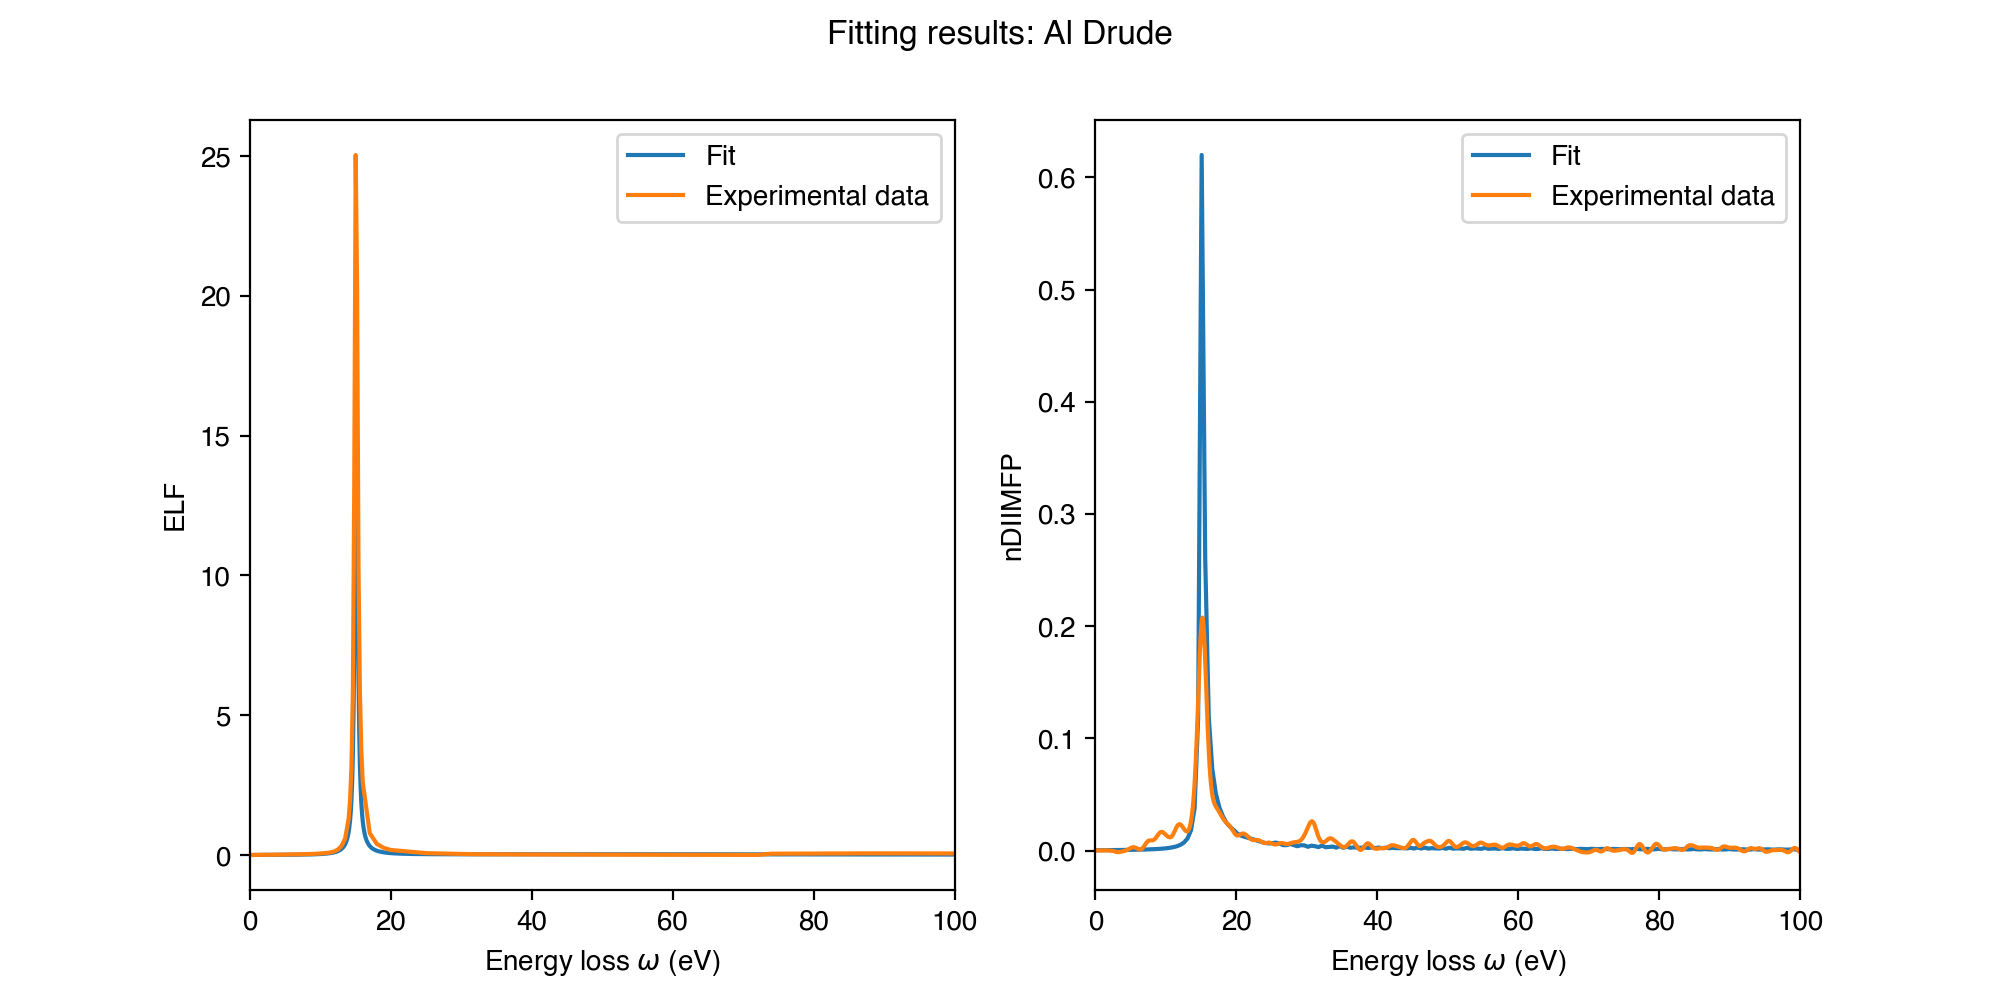

In [5]:
fd = np.loadtxt('Al/al.diel')
x_exp_elf = fd[:,0]
y_exp_elf = fd[:,3]

exp_data = np.loadtxt('/Users/olgaridzel/Research/olga-optical-data/MATLAB/diimfp/wolga/al.wo', usecols = (0,1,2))
x_exp_ndiimfp = exp_data[:,0]
y_exp_ndiimfp = exp_data[:,1]

exp_data = opt.exp_data()
exp_data.x_elf = x_exp_elf
exp_data.y_elf = y_exp_elf
exp_data.x_ndiimfp = x_exp_ndiimfp
exp_data.y_ndiimfp = y_exp_ndiimfp

opt_ = opt.OptFit(al_drude, exp_data, 1600, n_q = 10)
result = opt_.runOptimisation(0.95, 0.05, maxeval = 1000, xtol_rel = 1e-4, isGlobal = True)
oscOptimised = opt_.vec2Struct(result)

opt_ = opt.OptFit(oscOptimised, exp_data, 1600, n_q = 10)
result = opt_.runOptimisation(0.9, 0.1, maxeval = 1000, xtol_rel = 1e-4, isGlobal = False)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')
print(f'alpha = {oscOptimised.oscillators.alpha}')
# print()
# print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
# print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
# print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

# oscOptimised = al_drude
oscOptimised.calculateELF()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axs[0].plot(oscOptimised.eloss,oscOptimised.ELF,label='Fit')
axs[0].plot(exp_data.x_elf,exp_data.y_elf,label='Experimental data')
axs[0].set_xlabel('Energy loss $\omega$ (eV)')
axs[0].set_ylabel('ELF')
axs[0].legend()
axs[0].set_xlim(0,100)

oscOptimised.calculateDIIMFP(3400)
axs[1].plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
axs[1].plot(exp_data.x_ndiimfp,exp_data.y_ndiimfp,label='Experimental data')
axs[1].set_xlabel('Energy loss $\omega$ (eV)')
axs[1].set_ylabel('nDIIMFP')
axs[1].legend()
axs[1].set_xlim(0,100)

fig.suptitle(f'Fitting results: {oscOptimised.name} {oscOptimised.oscillators.model}')
plt.show()

In [6]:
# A = [0.54, 0.33, 0.1, 0.03, 0.02]
# gamma = [0.46, 0.5, 1.49, 6.75, 30.49]
# omega = [14.99, 15.21, 16.13, 21.56, 91.69]

A = [0.03, 0.124, 0.057, 0.023, 0.018]
gamma = [0.468, 0.53, 1.516, 6.175, 47.302]
omega = [15.249, 14.849, 14.868, 22.499, 167.293]

M = 26.981538 # Molar weight
rho = 2.70 # g/cm3

oscillators = opt.Oscillators('Mermin', A, gamma, omega, alpha = 1)
composition = opt.Composition(['al'], [1])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0.01

al_m = opt.Material('Al', oscillators, composition, eloss, q, xraypath)
al_m.Eg = 0
al_m.Ef = 11.2
al_m.atomic_density = rho * opt.N_Avogadro / M *1e-24
al_m.static_refractive_index = 1.1563
al_m.Z = 13
al_m.use_henke_for_ne = True
al_m.use_KK_constraint = False

fsum = al_m.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(al_m.Z))

kksum = al_m.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 10.192437887441848
Z = 13
KKSum = 0.2577262366885931


<IPython.core.display.Javascript object>


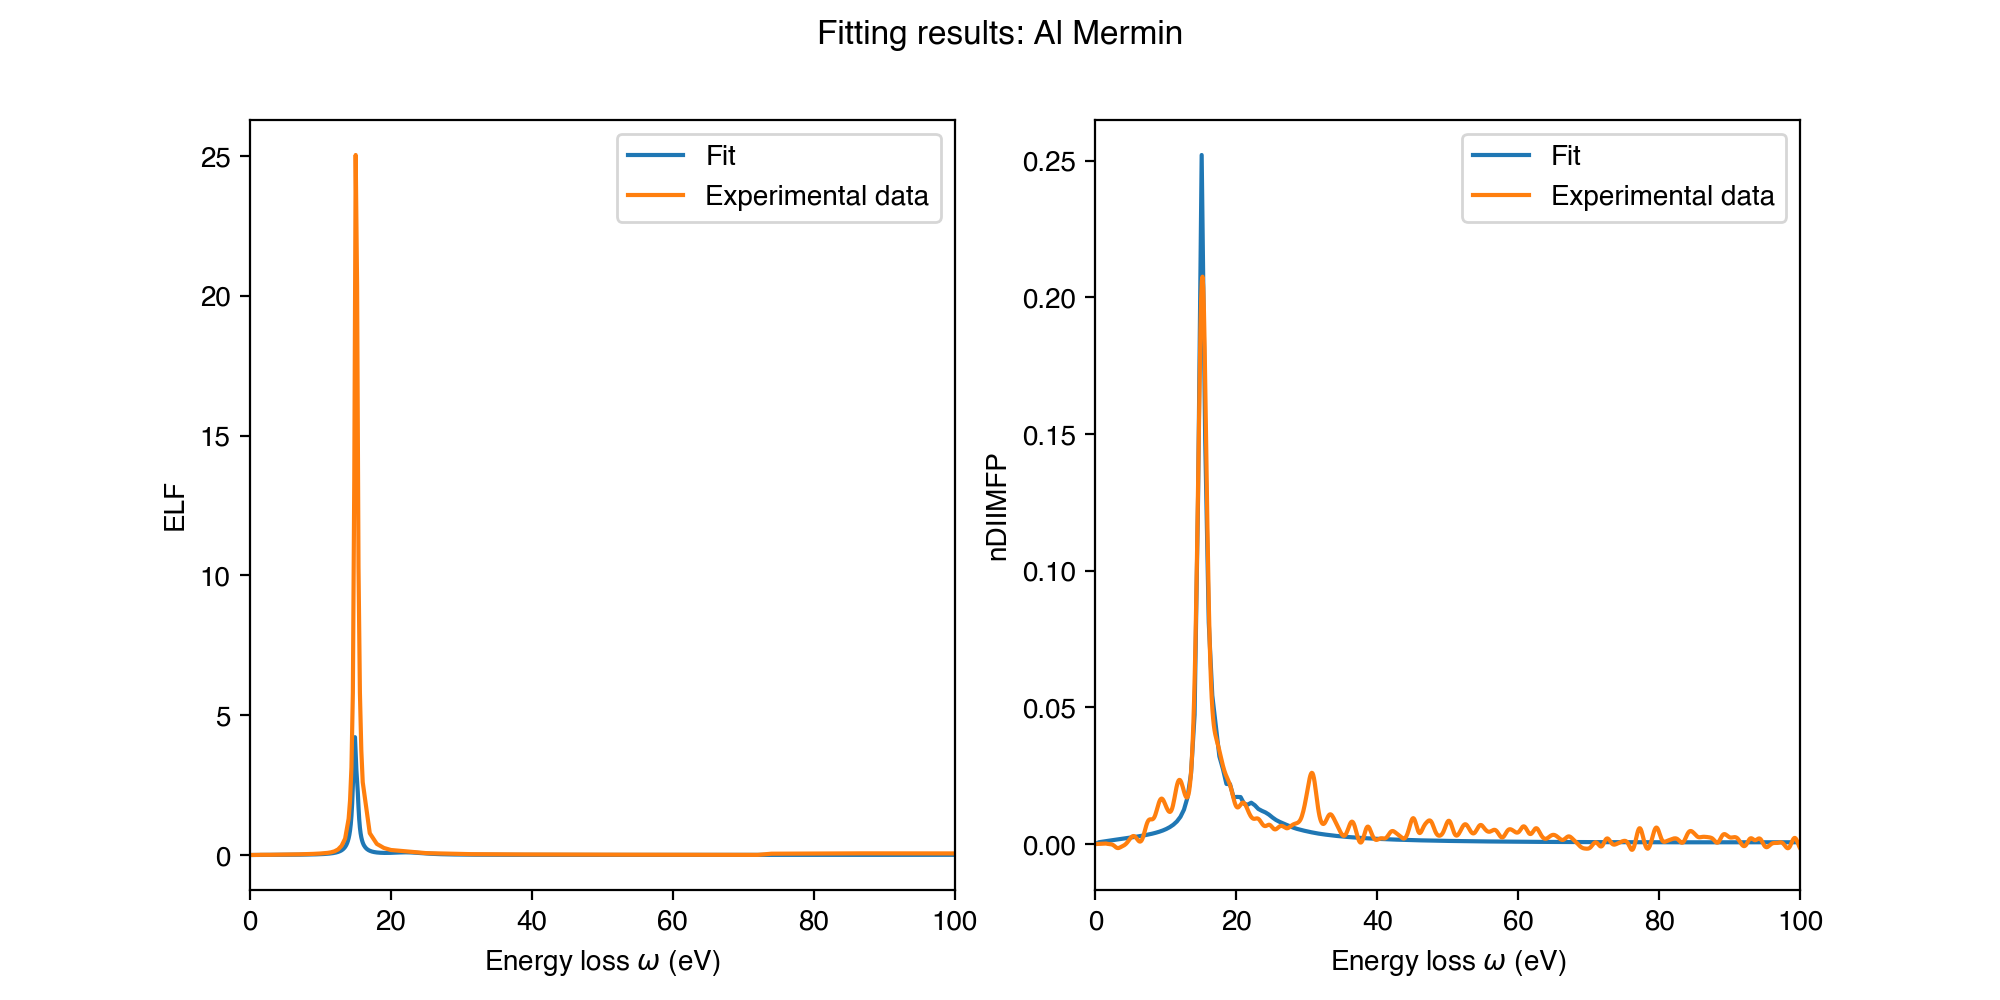

In [7]:
fd = np.loadtxt('Al/al.diel')
x_exp_elf = fd[:,0]
y_exp_elf = fd[:,3]

exp_data = np.loadtxt('/Users/olgaridzel/Research/olga-optical-data/MATLAB/diimfp/wolga/al.wo', usecols = (0,1,2))
x_exp_ndiimfp = exp_data[:,0]
y_exp_ndiimfp = exp_data[:,1]

exp_data = opt.exp_data()
exp_data.x_elf = x_exp_elf
exp_data.y_elf = y_exp_elf
exp_data.x_ndiimfp = x_exp_ndiimfp
exp_data.y_ndiimfp = y_exp_ndiimfp

# opt_ = opt.OptFit(al_m, exp_data, 1600, n_q = 10)
# result = opt_.runOptimisation('elf+ndiimfp', maxeval = 500, xtol_rel = 1e-2)
# oscOptimised = opt_.vec2Struct(result)

# fsum = oscOptimised.evaluateFsum()
# print('FSum = {}'.format(fsum))
# print('Z = {}'.format(oscOptimised.Z))

# kksum = oscOptimised.evaluateKKsum()
# print('KKSum = {}'.format(kksum))

# print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
# print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
# print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')
# print(f'alpha = {oscOptimised.oscillators.alpha}')
# print()
# print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
# print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
# print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

oscOptimised = al_m
oscOptimised.calculateELF()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axs[0].plot(oscOptimised.eloss,oscOptimised.ELF,label='Fit')
axs[0].plot(exp_data.x_elf,exp_data.y_elf,label='Experimental data')
axs[0].set_xlabel('Energy loss $\omega$ (eV)')
axs[0].set_ylabel('ELF')
axs[0].legend()
axs[0].set_xlim(0,100)

oscOptimised.calculateDIIMFP(3400)
axs[1].plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
axs[1].plot(exp_data.x_ndiimfp,exp_data.y_ndiimfp,label='Experimental data')
axs[1].set_xlabel('Energy loss $\omega$ (eV)')
axs[1].set_ylabel('nDIIMFP')
axs[1].legend()
axs[1].set_xlim(0,100)

fig.suptitle(f'Fitting results: {oscOptimised.name} {oscOptimised.oscillators.model}')
plt.show()

In [106]:
plt.figure()
al_m.eloss = np.linspace(0,1000,2000)
al_m.calculateELF()
q_list = opt.linspace(0.0, 18, 0.02)

fd = open('Al/elf.in', 'w')

for q in q_list:
    al_m.q = q
    al_m.calculateELF()
    for i in range(len(al_m.eloss)):
        fd.write(f'{al_m.eloss[i]:.8f} {al_m.ELF[i]:.8f}\n')
    fd.write(f'{q} {q}\n')
    fd.write('99999999 99999999\n')
    plt.plot(al_m.eloss, al_m.ELF)
    
plt.show()
fd.close()

**Au**

In [94]:
A = [0.01, 0.02, 0.07, 0.1, 0.07, 0.007, 0.16, 0.15, 0.13, 0.08, 0.02, 0.09, 0.16, 0.02, 0.003, 0.005, 0.008]
gamma = [0.29, 0.81, 3.05, 5.62, 5.04, 2.05, 8.04, 8.56, 10.86, 10.79, 11.13, 5.39, 29.85, 34.51, 38.38, 62.79, 376.54]
omega =[2.62, 3.34, 6.31, 10.58, 17.08, 25.75, 25.39, 33.65, 39.17, 45.72, 52.12, 14.57, 64.21, 96.19, 278.92, 210.69, 470.93]

M = 196.966570 # Molar weight
rho = 19.32 # g/cm3

oscillators = opt.Oscillators('Mermin', A, gamma, omega, alpha = 0)
composition = opt.Composition(['au'], [1])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0.01

au_m = opt.Material('au', oscillators, composition, eloss, q, xraypath)
au_m.Eg = 0
au_m.Ef = 9
au_m.atomic_density = rho * opt.N_Avogadro / M *1e-24
au_m.static_refractive_index = 1.25
au_m.Z = 79
au_m.use_henke_for_ne = True
au_m.use_KK_constraint = False
au_m.use_kk_relation = False

fsum = au_m.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(au_m.Z))

kksum = au_m.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 75.00159991983254
Z = 79
KKSum = 1.1008723805405343


In [3]:
A = [79, 9, 36, 17, 60, 100, 120, 155, 145, 280, 360, 183]
gamma = [0.1, 1, 1.9, 2.3, 4, 9, 10, 6, 7.2, 20, 28, 26]
omega = [0, 3.1, 4.1, 5.3, 8.17, 12, 14, 21.3, 29.5, 38.5, 63, 100]

M = 196.966570 # Molar weight
rho = 19.32 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 1)
composition = opt.Composition(['au'], [1])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0.01

au_drude = opt.Material('au', oscillators, composition, eloss, q, xraypath)
au_drude.Eg = 0
au_drude.Ef = 9
au_drude.atomic_density = rho * opt.N_Avogadro / M *1e-24
au_drude.static_refractive_index = 1.25
au_drude.Z = 79
au_drude.use_henke_for_ne = True
au_drude.use_KK_constraint = False
au_drude.use_kk_relation = False

fsum = au_drude.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(au_drude.Z))

kksum = au_drude.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 74.32159929044332
Z = 79
KKSum = 1.0100393979296218


In [13]:
n_in = 20
E0 = 1500

mu_i = np.cos(np.deg2rad(30))
mu_o = np.cos(np.deg2rad(30))

# au_drude.calculateElasticProperties(E0)
au_drude.calculate(E0, n_in, 200, mu_i, mu_o)
au_drude.calculateEnergyDistribution(E0,n_in)

    
E (eV)=  1.5000000E+03
 i=   2,   r= 1.18834E-06,   r*Wabs=  0.00000E+00
 i=   3,   r= 2.40073E-06,   r*Wabs=  0.00000E+00
 i=   4,   r= 3.63767E-06,   r*Wabs=  0.00000E+00
 i=   5,   r= 4.89965E-06,   r*Wabs=  0.00000E+00
 i=   6,   r= 6.18718E-06,   r*Wabs=  0.00000E+00
 i=   7,   r= 7.50077E-06,   r*Wabs=  0.00000E+00
 i=   8,   r= 8.84096E-06,   r*Wabs=  0.00000E+00
 i=   9,   r= 1.02083E-05,   r*Wabs= -3.89225E-04
 i=  10,   r= 1.16033E-05,   r*Wabs= -1.07905E-03
 i=  11,   r= 1.30265E-05,   r*Wabs= -1.53520E-03
 i=  12,   r= 1.44786E-05,   r*Wabs= -1.80678E-03
 i=  13,   r= 1.59600E-05,   r*Wabs= -2.01141E-03
 i=  14,   r= 1.74714E-05,   r*Wabs= -2.18301E-03
 i=  15,   r= 1.90135E-05,   r*Wabs= -2.33534E-03
 i=  16,   r= 2.05867E-05,   r*Wabs= -2.47518E-03
 i=  17,   r= 2.21918E-05,   r*Wabs= -2.60628E-03
 i=  18,   r= 2.38294E-05,   r*Wabs= -2.73096E-03
 i=  19,   r= 2.55002E-05,   r*Wabs= -2.85071E-03
 i=  20,   r= 2.72048E-05,   r*Wabs= -2.96655E-03
 i=  21,   r= 2.89439E

 i= 175,   r= 1.86057E-03,   r*Wabs= -1.87719E-02
 i= 176,   r= 1.89942E-03,   r*Wabs= -1.87593E-02
 i= 177,   r= 1.93906E-03,   r*Wabs= -1.87358E-02
 i= 178,   r= 1.97950E-03,   r*Wabs= -1.87006E-02
 i= 179,   r= 2.02076E-03,   r*Wabs= -1.86528E-02
 i= 180,   r= 2.06285E-03,   r*Wabs= -1.85913E-02
 i= 181,   r= 2.10579E-03,   r*Wabs= -1.85153E-02
 i= 182,   r= 2.14961E-03,   r*Wabs= -1.84234E-02
 i= 183,   r= 2.19431E-03,   r*Wabs= -1.83144E-02
 i= 184,   r= 2.23991E-03,   r*Wabs= -1.81871E-02
 i= 185,   r= 2.28644E-03,   r*Wabs= -1.80397E-02
 i= 186,   r= 2.33391E-03,   r*Wabs= -1.78707E-02
 i= 187,   r= 2.38234E-03,   r*Wabs= -1.76783E-02
 i= 188,   r= 2.43175E-03,   r*Wabs= -1.74604E-02
 i= 189,   r= 2.48217E-03,   r*Wabs= -1.72149E-02
 i= 190,   r= 2.53360E-03,   r*Wabs= -1.69391E-02
 i= 191,   r= 2.58607E-03,   r*Wabs= -1.66227E-02
 i= 192,   r= 2.63960E-03,   r*Wabs= -1.62847E-02
 i= 193,   r= 2.69422E-03,   r*Wabs= -1.59132E-02
 i= 194,   r= 2.74994E-03,   r*Wabs= -1.54686E-02


 i= 394,   r= 1.53280E-01,   r*Wabs= -1.70656E-02
 i= 395,   r= 1.56356E-01,   r*Wabs= -1.84777E-02
 i= 396,   r= 1.59495E-01,   r*Wabs= -1.99156E-02
 i= 397,   r= 1.62695E-01,   r*Wabs= -2.13755E-02
 i= 398,   r= 1.65959E-01,   r*Wabs= -2.28535E-02
 i= 399,   r= 1.69288E-01,   r*Wabs= -2.43457E-02
 i= 400,   r= 1.72683E-01,   r*Wabs= -2.58488E-02
 i= 401,   r= 1.76146E-01,   r*Wabs= -2.73596E-02
 i= 402,   r= 1.79677E-01,   r*Wabs= -2.88746E-02
 i= 403,   r= 1.83278E-01,   r*Wabs= -3.03913E-02
 i= 404,   r= 1.86951E-01,   r*Wabs= -3.19071E-02
 i= 405,   r= 1.90696E-01,   r*Wabs= -3.34198E-02
 i= 406,   r= 1.94516E-01,   r*Wabs= -3.49274E-02
 i= 407,   r= 1.98411E-01,   r*Wabs= -3.64285E-02
 i= 408,   r= 2.02383E-01,   r*Wabs= -3.79218E-02
 i= 409,   r= 2.06434E-01,   r*Wabs= -3.94065E-02
 i= 410,   r= 2.10565E-01,   r*Wabs= -4.08821E-02
 i= 411,   r= 2.14778E-01,   r*Wabs= -4.23487E-02
 i= 412,   r= 2.19074E-01,   r*Wabs= -4.38065E-02
 i= 413,   r= 2.23455E-01,   r*Wabs= -4.52564E-02


 i= 677,   r= 1.70674E+01,   r*Wabs= -1.41206E-09
 i= 678,   r= 1.72416E+01,   r*Wabs= -1.08948E-09
 i= 679,   r= 1.74167E+01,   r*Wabs= -8.39474E-10
 i= 680,   r= 1.75927E+01,   r*Wabs= -6.45980E-10
 i= 681,   r= 1.77696E+01,   r*Wabs= -4.96431E-10
 i= 682,   r= 1.79474E+01,   r*Wabs= -3.81004E-10
 i= 683,   r= 1.81261E+01,   r*Wabs= -2.92033E-10
 i= 684,   r= 1.83056E+01,   r*Wabs= -2.23548E-10
 i= 685,   r= 1.84860E+01,   r*Wabs= -1.70903E-10
 i= 686,   r= 1.86672E+01,   r*Wabs= -1.30488E-10
 i= 687,   r= 1.88494E+01,   r*Wabs= -9.95026E-11
 i= 688,   r= 1.90323E+01,   r*Wabs= -7.57787E-11
 i= 689,   r= 1.92162E+01,   r*Wabs= -5.76382E-11
 i= 690,   r= 1.94008E+01,   r*Wabs= -4.37852E-11
 i= 691,   r= 1.95863E+01,   r*Wabs= -3.32201E-11
 i= 692,   r= 1.97727E+01,   r*Wabs= -2.51730E-11
 i= 693,   r= 1.99599E+01,   r*Wabs= -1.90515E-11
 i= 694,   r= 2.01479E+01,   r*Wabs= -1.44010E-11
 i= 695,   r= 2.03367E+01,   r*Wabs= -1.08723E-11
 i= 696,   r= 2.05263E+01,   r*Wabs= -8.19828E-12


      95      1.40423194E-03  6.61517E-06      1.40433585E-03  6.61802E-06
      96      1.36929823E-03  5.71271E-06      1.36939890E-03  5.71517E-06
      97      1.33544524E-03  4.93363E-06      1.33554278E-03  4.93575E-06
      98      1.30264591E-03  4.26100E-06      1.30274044E-03  4.26284E-06
      99      1.27085111E-03  3.68027E-06      1.27094274E-03  3.68185E-06
     100      1.24003284E-03  3.17884E-06      1.24012167E-03  3.18021E-06
     105      1.09935105E-03  1.52937E-06      1.09942733E-03  1.53003E-06
     110      9.78295708E-04  7.36589E-07      9.78361485E-04  7.36905E-07
     115      8.73704588E-04  3.55108E-07      8.73761537E-04  3.55260E-07
     120      7.82975929E-04  1.71332E-07      7.83025429E-04  1.71405E-07
     125      7.03963526E-04  8.27132E-08      7.04006714E-04  8.27486E-08
     130      6.34901904E-04  3.99443E-08      6.34939723E-04  3.99614E-08
     135      5.74324444E-04  1.92838E-08      5.74357678E-04  1.92921E-08
     140      5.21000814E

In [8]:
exp_data = np.loadtxt('e_Au01_0017.txt')

In [ ]:
ind = 

<IPython.core.display.Javascript object>


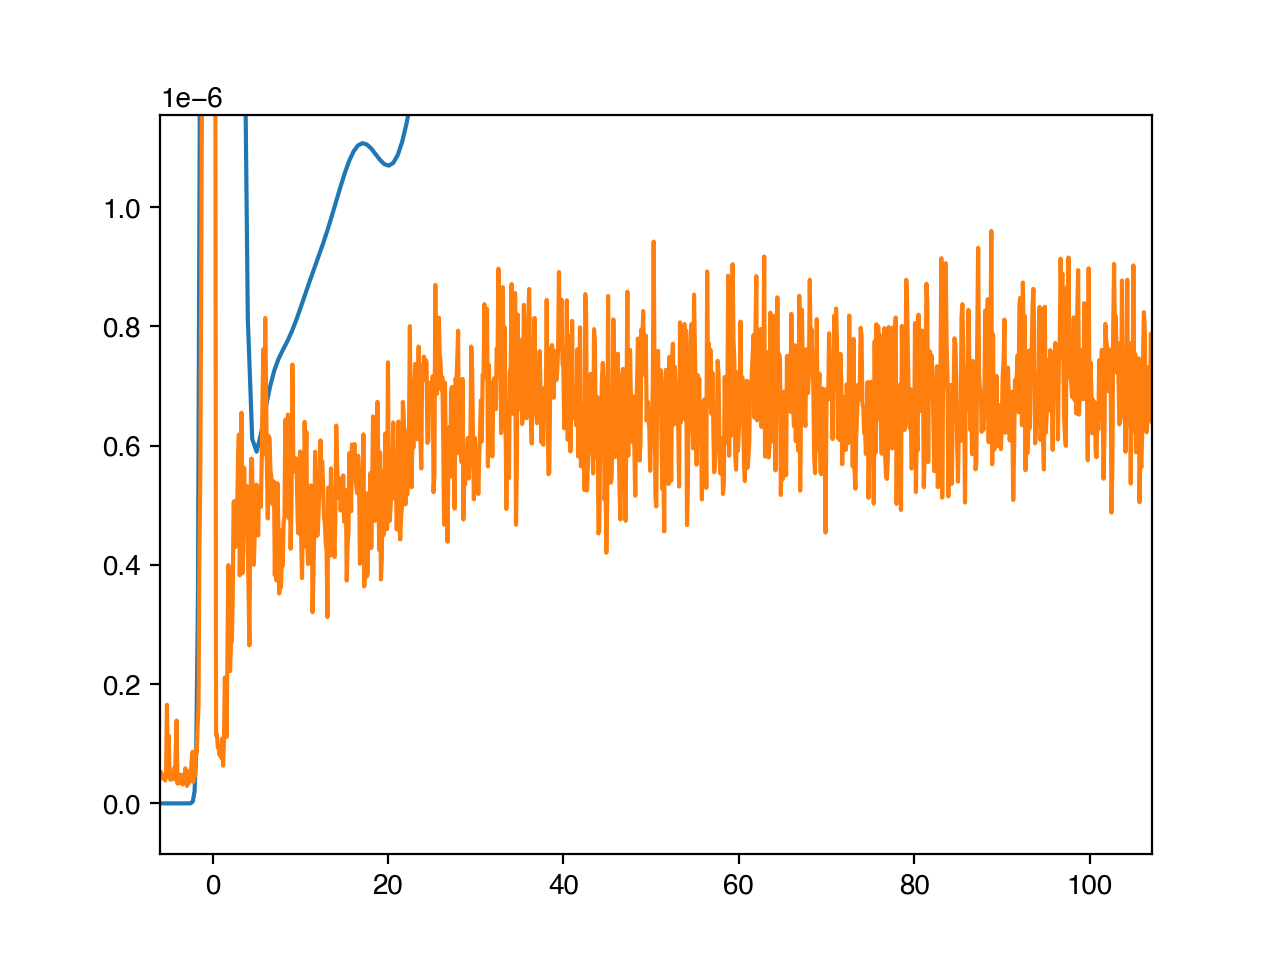

In [12]:
plt.figure()
plt.plot(au_drude.spectrum_E, au_drude.spectrum)
plt.plot(exp_data[np.argmax(exp_data[:,1]),0]-exp_data[:,0],exp_data[:,1]/np.max(exp_data[:,1])*np.max(au_drude.spectrum))
plt.show()

In [7]:
res = os.system('cat')

**Be**

In [3]:
# A = [316.479, 115.353, 53.251]
# gamma = [2.43, 99.887, 23.921]
# omega = [0.041, 409.504, 17.496]
# alpha = 0.989

A = [310.33, 60.046, 38.365]
gamma = [4.234, 99.992, 22.885]
omega = [0.044, 464.911, 14.776]
alpha = 0.9894520498629986

M = 9.012183 # Molar weight
rho = 1.85 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = alpha)
composition = opt.Composition(['be'], [1])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

be_drude = opt.Material('Be', oscillators, composition, eloss, q, xraypath)
be_drude.Eg = 0
be_drude.Ef = 14.3
be_drude.atomic_density = rho * opt.N_Avogadro / M *1e-24
be_drude.static_refractive_index = 3.4
be_drude.Z = 4
be_drude.use_henke_for_ne = True
be_drude.use_KK_constraint = True

fsum = be_drude.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(be_drude.Z))

kksum = be_drude.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 3.9784165765067443
Z = 4
KKSum = 1.0109761549181822


Starting optimisation...
found minimum after 1000 evaluations
minimum value =  0.00016971573661736346
result code =  5
FSum = 4.106086020360285
Z = 4
KKSum = 1.0108455972773087
A = [316.364, 101.242, 53.295]
gamma = [2.43, 99.973, 23.936]
omega = [0.034, 477.38, 17.486]
alpha = 0.9888796772268219


<IPython.core.display.Javascript object>


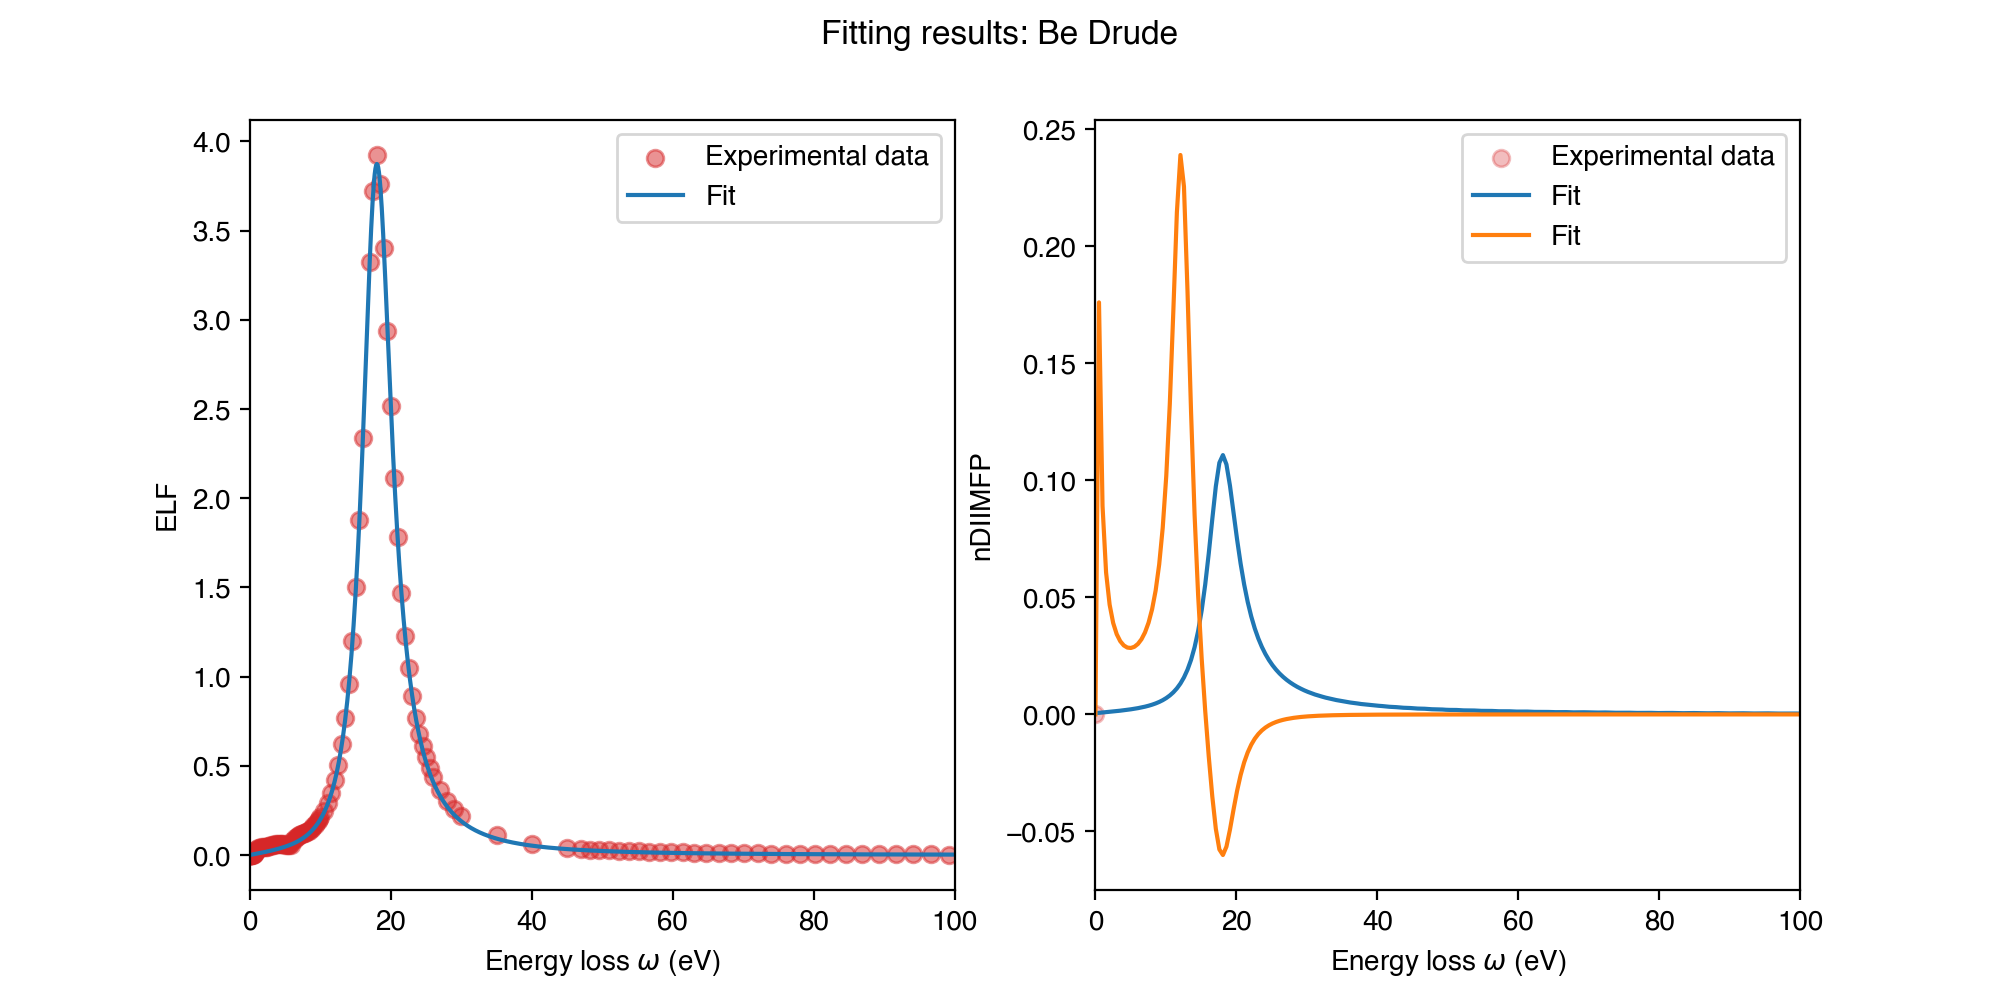

In [4]:
fd = np.loadtxt('/Users/olgaridzel/Research/PHYSDAT/opt/pal/be.diel')
x_exp_elf = fd[:,0]
y_exp_elf = fd[:,3]

exp_data = opt.exp_data()
exp_data.x_elf = x_exp_elf
exp_data.y_elf = y_exp_elf
exp_data.x_ndiimfp = 0
exp_data.y_ndiimfp = 0

E0 = 1000
opt_ = opt.OptFit(be_drude, exp_data, E0, n_q = 10)
result = opt_.runOptimisation(0, 1, maxeval = 1000, xtol_rel = 1e-7, isGlobal = False)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')
print(f'alpha = {oscOptimised.oscillators.alpha}')
# print()
# print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
# print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
# print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

# oscOptimised = be_drude
oscOptimised.calculateELF()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axs[0].scatter(exp_data.x_elf,exp_data.y_elf,label='Experimental data', c='tab:red', alpha = 0.5)
axs[0].plot(oscOptimised.eloss,oscOptimised.ELF,label='Fit')
axs[0].set_xlabel('Energy loss $\omega$ (eV)')
axs[0].set_ylabel('ELF')
axs[0].legend()
axs[0].set_xlim(0,100)

oscOptimised.calculateDIIMFP(1600)
axs[1].scatter(exp_data.x_ndiimfp,exp_data.y_ndiimfp,label='Experimental data', c='tab:red', alpha = 0.3)
axs[1].plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
axs[1].plot(oscOptimised.DIIMFP_E,oscOptimised.DSEP,label='Fit')
axs[1].set_xlabel('Energy loss $\omega$ (eV)')
axs[1].set_ylabel('nDIIMFP')
axs[1].legend()
axs[1].set_xlim(0,100)

fig.suptitle(f'Fitting results: {oscOptimised.name} {oscOptimised.oscillators.model}')
plt.show()

<IPython.core.display.Javascript object>


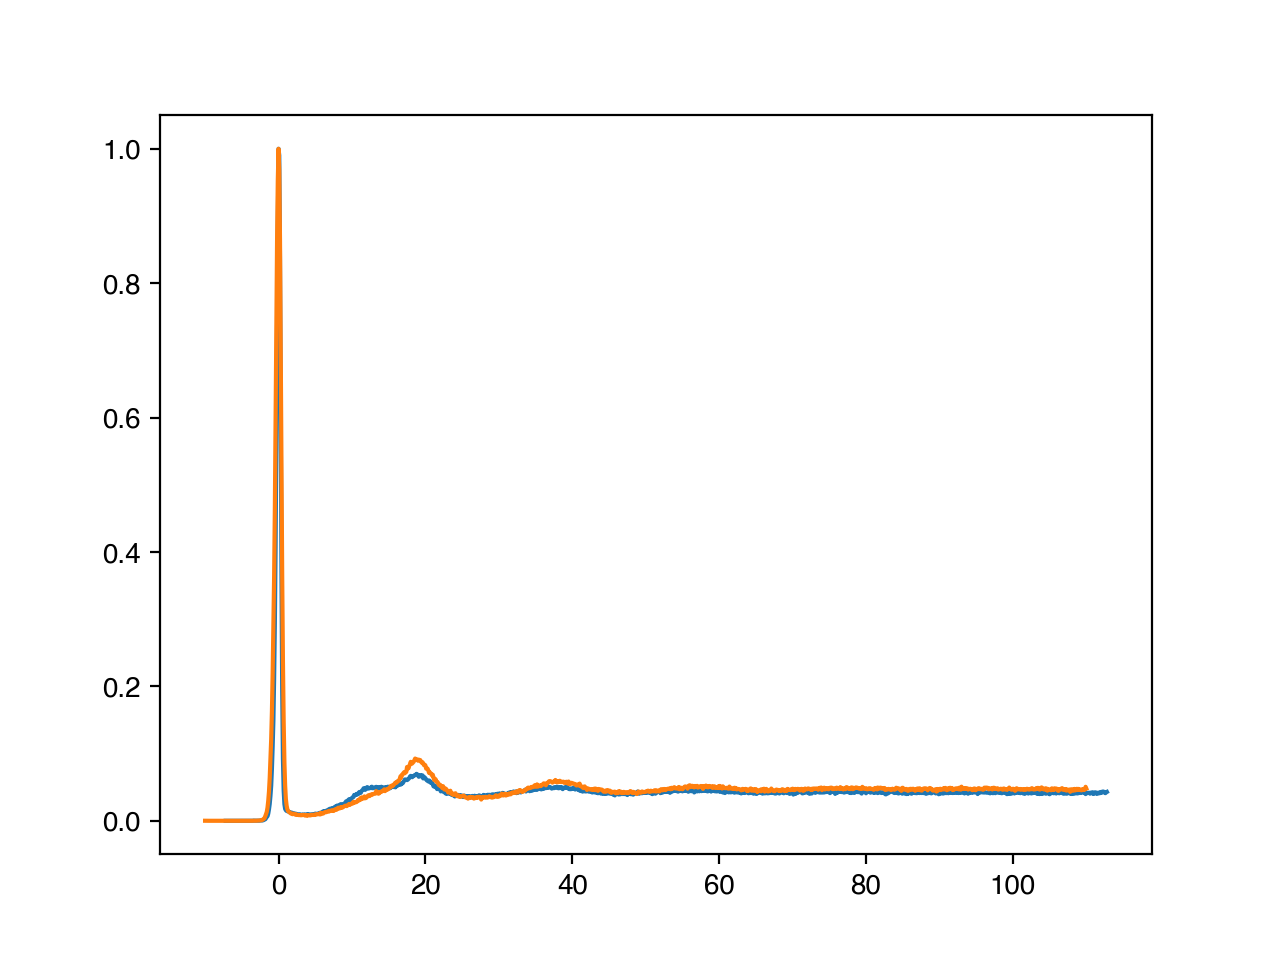

In [4]:
d1 = np.loadtxt("e_Be_0028.txt", skiprows=52)
d2 = np.loadtxt("e_Be_0029.txt", skiprows=52)
d3 = np.loadtxt("e_Be_0035.txt", skiprows=52) # 1500 60-60
d4 = np.loadtxt("e_Be_0036.txt", skiprows=52) # 1500 30-30

plt.figure()
plt.plot(d3[np.argmax(d3[:,1]),0] - d3[:,0], d3[:,1] / np.max(d3[:,1]))
plt.plot(d4[np.argmax(d4[:,1]),0] - d4[:,0], d4[:,1] / np.max(d4[:,1]))
plt.show()

In [20]:
print(d3[np.argmax(d3[:,1]),0])
print(d4[np.argmax(d4[:,1]),0])

1512.8
1510.0


In [ ]:
d4 = np.loadtxt("e_Be_0036.txt", skiprows=52) # 1500 30-30
x_spec = d4[:,0]
y_spec = d4[:,1]

ind = np.logical_and(x_spec > x_spec[np.argmax(y_spec)] - 3, x_spec < x_spec[np.argmax(y_spec)] + 3)
x = x_spec[ind]
y = y_spec[ind]
exp_area = np.trapz(y, x)

exp_data = opt.exp_data()
exp_data.x_spec = x_spec
exp_data.y_spec = y_spec

mu_i = np.cos(np.deg2rad(30))
mu_o = np.cos(np.deg2rad(30))

E0 = d4[np.argmax(d4[:,1]),0]
n_in = 10
opt_ = opt.OptFit(be_drude, exp_data, E0, n_q = 10)
result = opt_.runOptimisationSpec(mu_i, mu_o, n_in, maxeval = 100, xtol_rel = 1e-4, isGlobal = False)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')
print(f'alpha = {oscOptimised.oscillators.alpha}')
# print()
# print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
# print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
# print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

be_drude = oscOptimised
be_drude.calculateElasticProperties(E0)
be_drude.calculateLegendreCoefficients(200)
be_drude.calculate(E0, n_in, 200, mu_i, mu_o)
be_drude.calculateEnergyDistribution(E0, n_in, x_spec,y_spec,0.1)

Starting spec optimisation...


  3%|██▎                                                                            | 3/100 [00:27<13:04,  8.09s/it]

<IPython.core.display.Javascript object>


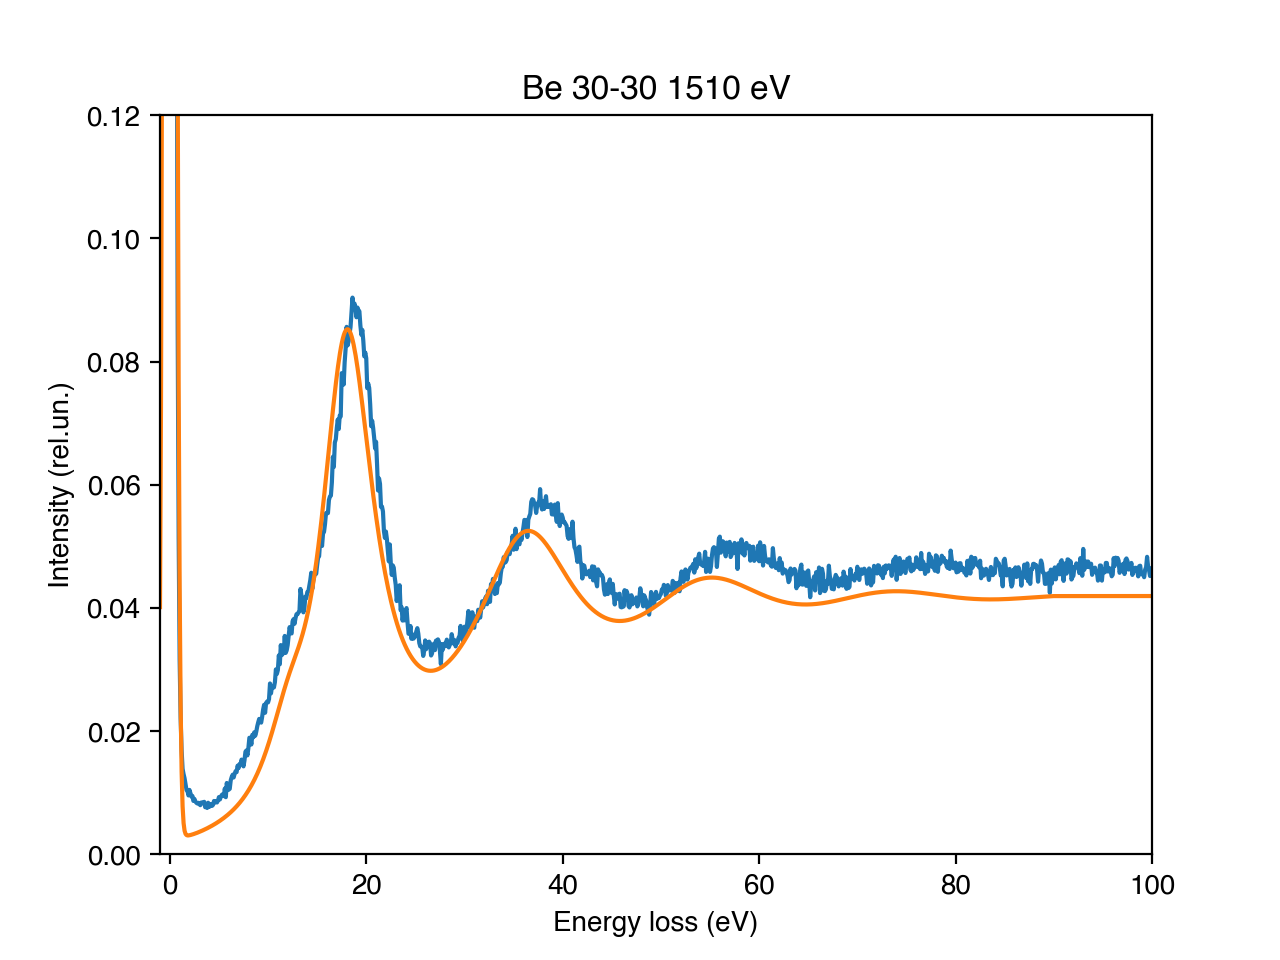

In [6]:
plt.figure()
plt.plot(E0 - x_spec, y_spec / exp_area)
plt.plot(be_drude.spectrum_E - be_drude.spectrum_E[np.argmax(be_drude.spectrum)], be_drude.spectrum / exp_area )
plt.ylim(0, 0.12)
plt.xlim(-1,100)
plt.title(f'Be 30-30 {round(E0)} eV')
plt.xlabel('Energy loss (eV)')
plt.ylabel('Intensity (rel.un.)')
plt.show()

<IPython.core.display.Javascript object>


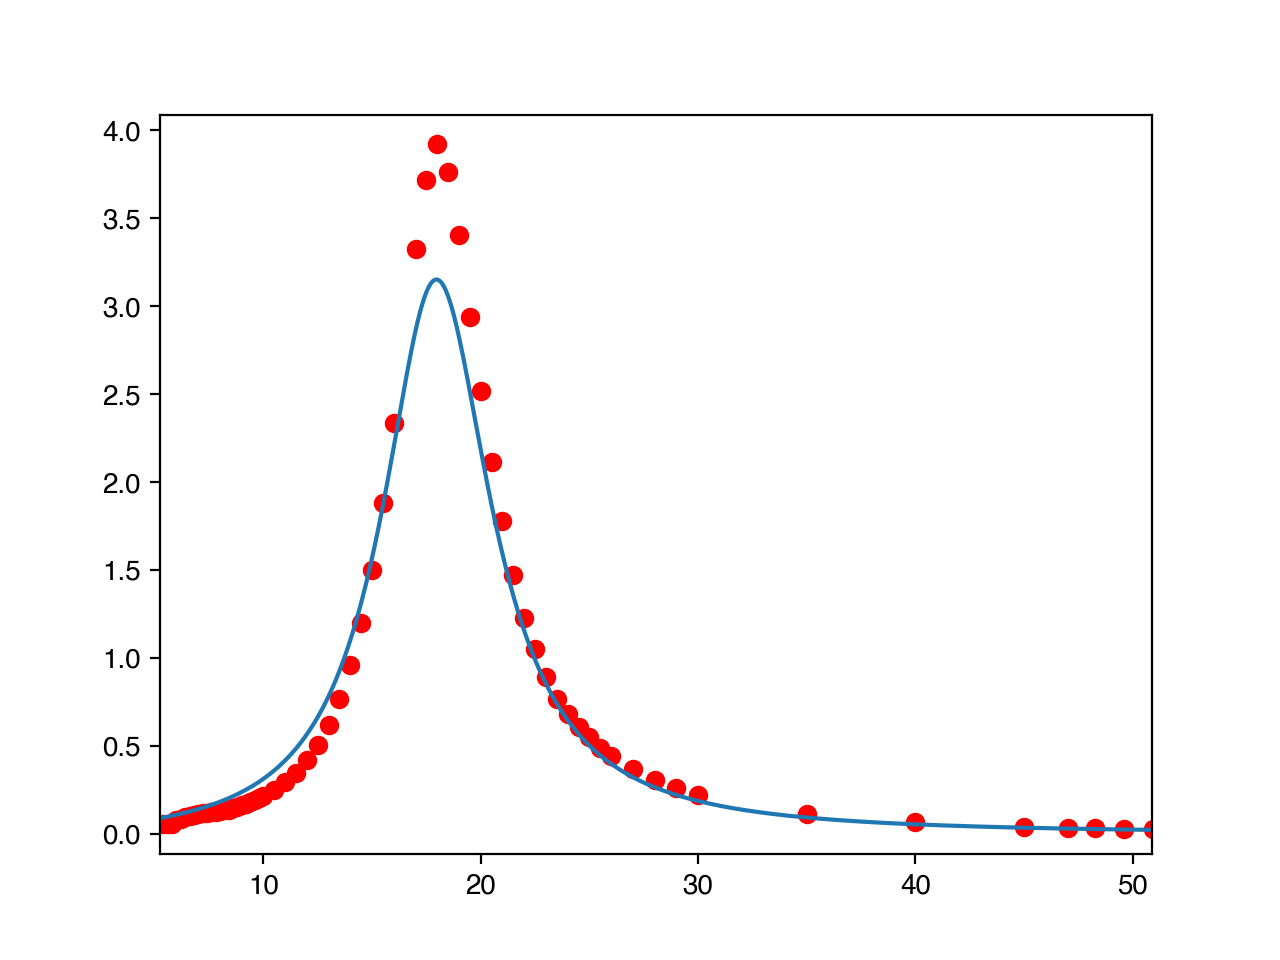

In [9]:
fd = np.loadtxt('/Users/olgaridzel/Research/PHYSDAT/opt/pal/be.diel')
x_exp_elf = fd[:,0]
y_exp_elf = fd[:,3]
be_drude.calculateELF()

plt.figure()
plt.plot(x_exp_elf, y_exp_elf,'o', color='red', label='Palik')
plt.plot(be_drude.eloss, be_drude.ELF)
plt.xlim(0,80)
plt.show()

In [15]:
coefs = be_drude.fitElasticPeak(x_spec, y_spec)
gauss_area = coefs[0]*coefs[2]*math.sqrt(math.pi)

In [17]:
n_in = 10
E0 = d4[np.argmax(d4[:,1]),0]

mu_i = np.cos(np.deg2rad(30))
mu_o = np.cos(np.deg2rad(30))

be_drude.calculateElasticProperties(E0)
be_drude.calculateLegendreCoefficients(200)
be_drude.calculate(E0, n_in, 200, mu_i, mu_o)
be_drude.calculateEnergyDistribution(E0,n_in,d4[:,0],d4[:,1],0.1)

    
E (eV)=  1.5100000E+03
 i=   2,   r= 4.25384E-07,   r*Wabs=  0.00000E+00
 i=   3,   r= 8.60103E-07,   r*Wabs= -5.57488E-06
 i=   4,   r= 1.30436E-06,   r*Wabs= -2.76311E-05
 i=   5,   r= 1.75837E-06,   r*Wabs= -3.74150E-05
 i=   6,   r= 2.22234E-06,   r*Wabs= -4.44854E-05
 i=   7,   r= 2.69648E-06,   r*Wabs= -5.04738E-05
 i=   8,   r= 3.18104E-06,   r*Wabs= -5.58455E-05
 i=   9,   r= 3.67622E-06,   r*Wabs= -6.08024E-05
 i=  10,   r= 4.18228E-06,   r*Wabs= -6.54500E-05
 i=  11,   r= 4.69943E-06,   r*Wabs= -6.98630E-05
 i=  12,   r= 5.22794E-06,   r*Wabs= -7.40938E-05
 i=  13,   r= 5.76804E-06,   r*Wabs= -7.81787E-05
 i=  14,   r= 6.31999E-06,   r*Wabs= -8.21441E-05
 i=  15,   r= 6.88406E-06,   r*Wabs= -8.60097E-05
 i=  16,   r= 7.46050E-06,   r*Wabs= -8.97915E-05
 i=  17,   r= 8.04959E-06,   r*Wabs= -9.35020E-05
 i=  18,   r= 8.65161E-06,   r*Wabs= -9.71522E-05
 i=  19,   r= 9.26684E-06,   r*Wabs= -1.00748E-04
 i=  20,   r= 9.89556E-06,   r*Wabs= -1.04300E-04
 i=  21,   r= 1.05381E

 i= 191,   r= 1.17883E-03,   r*Wabs= -1.97244E-03
 i= 192,   r= 1.20512E-03,   r*Wabs= -2.00815E-03
 i= 193,   r= 1.23199E-03,   r*Wabs= -2.04457E-03
 i= 194,   r= 1.25944E-03,   r*Wabs= -2.08165E-03
 i= 195,   r= 1.28750E-03,   r*Wabs= -2.11941E-03
 i= 196,   r= 1.31618E-03,   r*Wabs= -2.15788E-03
 i= 197,   r= 1.34548E-03,   r*Wabs= -2.19705E-03
 i= 198,   r= 1.37543E-03,   r*Wabs= -2.23695E-03
 i= 199,   r= 1.40603E-03,   r*Wabs= -2.27758E-03
 i= 200,   r= 1.43731E-03,   r*Wabs= -2.31895E-03
 i= 201,   r= 1.46927E-03,   r*Wabs= -2.36108E-03
 i= 202,   r= 1.50193E-03,   r*Wabs= -2.40397E-03
 i= 203,   r= 1.53531E-03,   r*Wabs= -2.44764E-03
 i= 204,   r= 1.56943E-03,   r*Wabs= -2.49209E-03
 i= 205,   r= 1.60429E-03,   r*Wabs= -2.53734E-03
 i= 206,   r= 1.63991E-03,   r*Wabs= -2.58341E-03
 i= 207,   r= 1.67632E-03,   r*Wabs= -2.63030E-03
 i= 208,   r= 1.71352E-03,   r*Wabs= -2.67801E-03
 i= 209,   r= 1.75154E-03,   r*Wabs= -2.72657E-03
 i= 210,   r= 1.79040E-03,   r*Wabs= -2.77599E-03


 i= 386,   r= 8.21224E-02,   r*Wabs= -3.94133E-02
 i= 387,   r= 8.39155E-02,   r*Wabs= -4.04923E-02
 i= 388,   r= 8.57475E-02,   r*Wabs= -4.15238E-02
 i= 389,   r= 8.76193E-02,   r*Wabs= -4.26013E-02
 i= 390,   r= 8.95317E-02,   r*Wabs= -4.36966E-02
 i= 391,   r= 9.14856E-02,   r*Wabs= -4.48085E-02
 i= 392,   r= 9.34819E-02,   r*Wabs= -4.59362E-02
 i= 393,   r= 9.55215E-02,   r*Wabs= -4.70785E-02
 i= 394,   r= 9.76053E-02,   r*Wabs= -4.82348E-02
 i= 395,   r= 9.97342E-02,   r*Wabs= -4.94038E-02
 i= 396,   r= 1.01909E-01,   r*Wabs= -5.05842E-02
 i= 397,   r= 1.04132E-01,   r*Wabs= -5.17746E-02
 i= 398,   r= 1.06402E-01,   r*Wabs= -5.29737E-02
 i= 399,   r= 1.08721E-01,   r*Wabs= -5.41803E-02
 i= 400,   r= 1.11091E-01,   r*Wabs= -5.53934E-02
 i= 401,   r= 1.13512E-01,   r*Wabs= -5.66119E-02
 i= 402,   r= 1.15986E-01,   r*Wabs= -5.78351E-02
 i= 403,   r= 1.18512E-01,   r*Wabs= -5.90615E-02
 i= 404,   r= 1.21094E-01,   r*Wabs= -6.02901E-02
 i= 405,   r= 1.23731E-01,   r*Wabs= -6.15201E-02


 i= 708,   r= 2.23156E+01,   r*Wabs= -3.83877E-10
 i= 709,   r= 2.25186E+01,   r*Wabs= -3.14275E-10
 i= 710,   r= 2.27225E+01,   r*Wabs= -2.57099E-10
 i= 711,   r= 2.29270E+01,   r*Wabs= -2.10168E-10
 i= 712,   r= 2.31324E+01,   r*Wabs= -1.71676E-10
 i= 713,   r= 2.33385E+01,   r*Wabs= -1.40130E-10
 i= 714,   r= 2.35453E+01,   r*Wabs= -1.14297E-10
 i= 715,   r= 2.37529E+01,   r*Wabs= -9.31580E-11
 i= 716,   r= 2.39612E+01,   r*Wabs= -7.58740E-11
 i= 717,   r= 2.41703E+01,   r*Wabs= -6.17524E-11
 i= 718,   r= 2.43800E+01,   r*Wabs= -5.02233E-11
 i= 719,   r= 2.45905E+01,   r*Wabs= -4.08177E-11
 i= 720,   r= 2.48017E+01,   r*Wabs= -3.31502E-11
 i= 721,   r= 2.50136E+01,   r*Wabs= -2.69042E-11
 i= 722,   r= 2.52263E+01,   r*Wabs= -2.18199E-11
 i= 723,   r= 2.54396E+01,   r*Wabs= -1.76843E-11
 i= 724,   r= 2.56536E+01,   r*Wabs= -1.43227E-11
 i= 725,   r= 2.58683E+01,   r*Wabs= -1.15922E-11
 i= 726,   r= 2.60837E+01,   r*Wabs= -9.37593E-12
 i= 727,   r= 2.62997E+01,   r*Wabs= -7.57831E-12


      84      1.51463001E-03  2.11322E-05      1.51474421E-03  2.11384E-05
      85      1.47655458E-03  1.91349E-05      1.47666486E-03  1.91405E-05
      86      1.43977348E-03  1.73287E-05      1.43988004E-03  1.73337E-05
      87      1.40422477E-03  1.56945E-05      1.40432778E-03  1.56991E-05
      88      1.36985326E-03  1.42157E-05      1.36995289E-03  1.42198E-05
      89      1.33660188E-03  1.28771E-05      1.33669827E-03  1.28809E-05
      90      1.30442521E-03  1.16654E-05      1.30451852E-03  1.16688E-05
      91      1.27327022E-03  1.05683E-05      1.27336056E-03  1.05714E-05
      92      1.24309960E-03  9.57499E-06      1.24318712E-03  9.57777E-06
      93      1.21386410E-03  8.67550E-06      1.21394891E-03  8.67802E-06
      94      1.18553275E-03  7.86094E-06      1.18561496E-03  7.86322E-06
      95      1.15806025E-03  7.12324E-06      1.15813997E-03  7.12531E-06
      96      1.13142011E-03  6.45511E-06      1.13149744E-03  6.45698E-06
      97      1.10557150E

0.0
0


In [27]:
spec_interp = np.interp(E0 - x_spec, be_drude.spectrum_E - be_drude.spectrum_E[np.argmax(be_drude.spectrum)], be_drude.spectrum)
# chi_squared = np.sum((self.exp_data.y_spec / exp_area - spec_interp / exp_area)**2 / self.exp_data.x_spec.size)

In [29]:
np.sum((y_spec / exp_area - spec_interp / exp_area)**2 / x_spec.size)

0.0001114590364427578

<IPython.core.display.Javascript object>


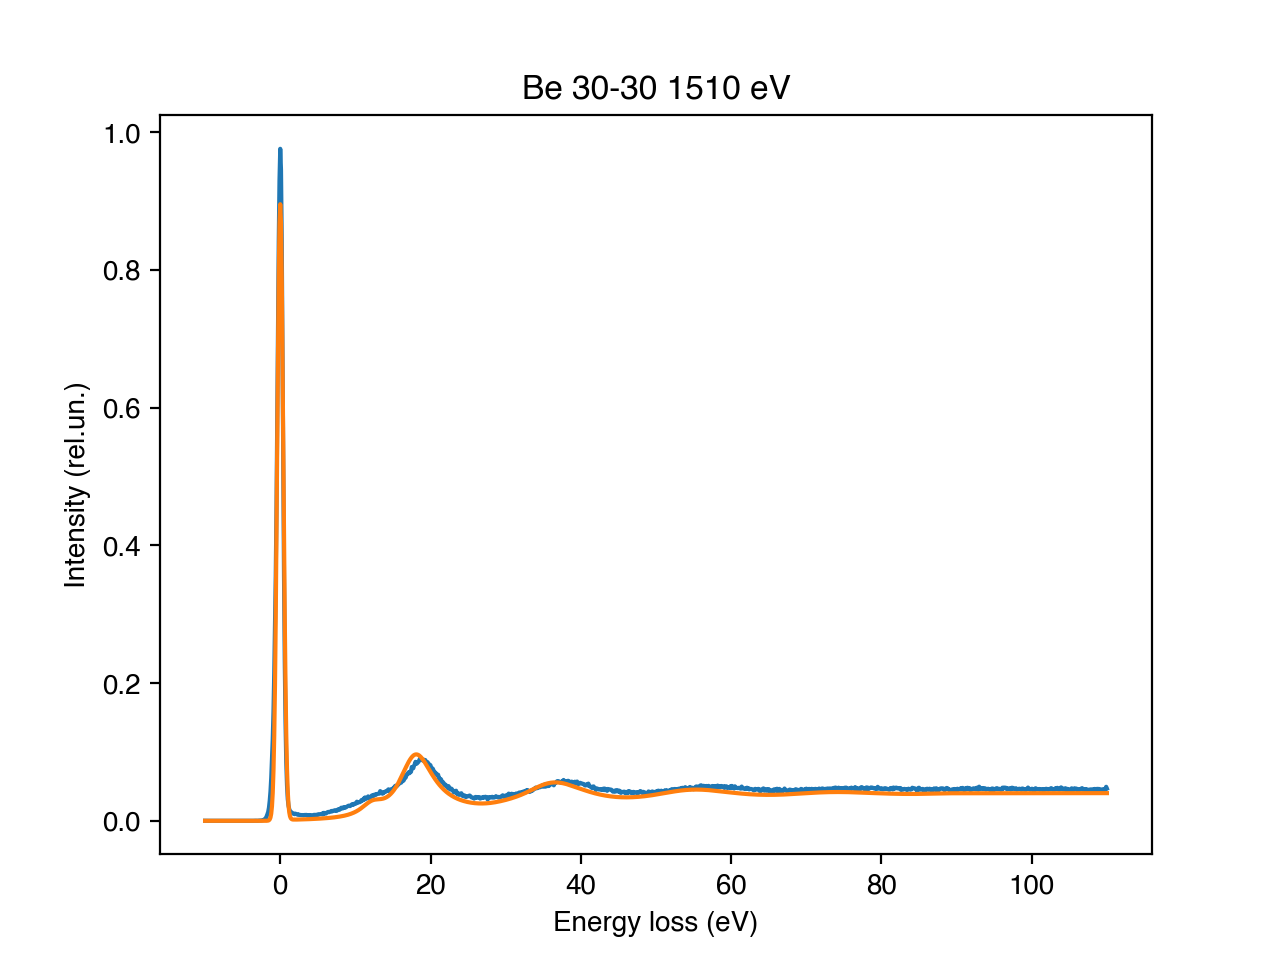

In [28]:
plt.figure()
plt.plot(E0 - x_spec, y_spec / exp_area)
plt.plot(E0 - x_spec, spec_interp / exp_area)
# plt.plot(be_drude.spectrum_E - be_drude.spectrum_E[np.argmax(be_drude.spectrum)], be_drude.spectrum / exp_area )
# plt.ylim(0, 0.12)
# plt.xlim(-1,100)
plt.title(f'Be 30-30 {round(E0)} eV')
plt.xlabel('Energy loss (eV)')
plt.ylabel('Intensity (rel.un.)')
plt.show()

In [8]:
be_drude.spectrum_E[np.argmax(be_drude.spectrum)]

10.010019009009008

In [10]:
n_in = 10
E0 = d3[np.argmax(d3[:,1]),0]

mu_i = np.cos(np.deg2rad(60))
mu_o = np.cos(np.deg2rad(60))

be_drude.calculate(E0, n_in, 200, mu_i, mu_o)
be_drude.calculateEnergyDistribution(E0,n_in,1.3,0.1)

    
E (eV)=  1.5128000E+03
 i=   2,   r= 4.25384E-07,   r*Wabs=  0.00000E+00
 i=   3,   r= 8.60103E-07,   r*Wabs= -5.57494E-06
 i=   4,   r= 1.30436E-06,   r*Wabs= -2.76311E-05
 i=   5,   r= 1.75837E-06,   r*Wabs= -3.74151E-05
 i=   6,   r= 2.22234E-06,   r*Wabs= -4.44854E-05
 i=   7,   r= 2.69648E-06,   r*Wabs= -5.04738E-05
 i=   8,   r= 3.18104E-06,   r*Wabs= -5.58455E-05
 i=   9,   r= 3.67622E-06,   r*Wabs= -6.08024E-05
 i=  10,   r= 4.18228E-06,   r*Wabs= -6.54500E-05
 i=  11,   r= 4.69943E-06,   r*Wabs= -6.98630E-05
 i=  12,   r= 5.22794E-06,   r*Wabs= -7.40938E-05
 i=  13,   r= 5.76804E-06,   r*Wabs= -7.81787E-05
 i=  14,   r= 6.31999E-06,   r*Wabs= -8.21441E-05
 i=  15,   r= 6.88406E-06,   r*Wabs= -8.60097E-05
 i=  16,   r= 7.46050E-06,   r*Wabs= -8.97915E-05
 i=  17,   r= 8.04959E-06,   r*Wabs= -9.35020E-05
 i=  18,   r= 8.65161E-06,   r*Wabs= -9.71522E-05
 i=  19,   r= 9.26684E-06,   r*Wabs= -1.00748E-04
 i=  20,   r= 9.89556E-06,   r*Wabs= -1.04300E-04
 i=  21,   r= 1.05381E

 i= 188,   r= 1.10330E-03,   r*Wabs= -1.86914E-03
 i= 189,   r= 1.12793E-03,   r*Wabs= -1.90293E-03
 i= 190,   r= 1.15310E-03,   r*Wabs= -1.93736E-03
 i= 191,   r= 1.17883E-03,   r*Wabs= -1.97243E-03
 i= 192,   r= 1.20512E-03,   r*Wabs= -2.00814E-03
 i= 193,   r= 1.23199E-03,   r*Wabs= -2.04456E-03
 i= 194,   r= 1.25944E-03,   r*Wabs= -2.08163E-03
 i= 195,   r= 1.28750E-03,   r*Wabs= -2.11940E-03
 i= 196,   r= 1.31618E-03,   r*Wabs= -2.15786E-03
 i= 197,   r= 1.34548E-03,   r*Wabs= -2.19704E-03
 i= 198,   r= 1.37543E-03,   r*Wabs= -2.23693E-03
 i= 199,   r= 1.40603E-03,   r*Wabs= -2.27756E-03
 i= 200,   r= 1.43731E-03,   r*Wabs= -2.31893E-03
 i= 201,   r= 1.46927E-03,   r*Wabs= -2.36106E-03
 i= 202,   r= 1.50193E-03,   r*Wabs= -2.40395E-03
 i= 203,   r= 1.53531E-03,   r*Wabs= -2.44761E-03
 i= 204,   r= 1.56943E-03,   r*Wabs= -2.49207E-03
 i= 205,   r= 1.60429E-03,   r*Wabs= -2.53732E-03
 i= 206,   r= 1.63991E-03,   r*Wabs= -2.58339E-03
 i= 207,   r= 1.67632E-03,   r*Wabs= -2.63027E-03


 i= 370,   r= 5.81086E-02,   r*Wabs= -2.58328E-02
 i= 371,   r= 5.93794E-02,   r*Wabs= -2.65735E-02
 i= 372,   r= 6.06779E-02,   r*Wabs= -2.72109E-02
 i= 373,   r= 6.20047E-02,   r*Wabs= -2.79987E-02
 i= 374,   r= 6.33604E-02,   r*Wabs= -2.86795E-02
 i= 375,   r= 6.47455E-02,   r*Wabs= -2.95060E-02
 i= 376,   r= 6.61608E-02,   r*Wabs= -3.02462E-02
 i= 377,   r= 6.76070E-02,   r*Wabs= -3.10968E-02
 i= 378,   r= 6.90845E-02,   r*Wabs= -3.20071E-02
 i= 379,   r= 7.05943E-02,   r*Wabs= -3.27796E-02
 i= 380,   r= 7.21368E-02,   r*Wabs= -3.37125E-02
 i= 381,   r= 7.37129E-02,   r*Wabs= -3.46888E-02
 i= 382,   r= 7.53233E-02,   r*Wabs= -3.55161E-02
 i= 383,   r= 7.69687E-02,   r*Wabs= -3.65061E-02
 i= 384,   r= 7.86498E-02,   r*Wabs= -3.75360E-02
 i= 385,   r= 8.03674E-02,   r*Wabs= -3.84951E-02
 i= 386,   r= 8.21224E-02,   r*Wabs= -3.94736E-02
 i= 387,   r= 8.39155E-02,   r*Wabs= -4.05422E-02
 i= 388,   r= 8.57475E-02,   r*Wabs= -4.15985E-02
 i= 389,   r= 8.76193E-02,   r*Wabs= -4.26750E-02


 i= 539,   r= 2.01623E+00,   r*Wabs= -6.37835E-02
 i= 540,   r= 2.05545E+00,   r*Wabs= -6.30435E-02
 i= 541,   r= 2.09534E+00,   r*Wabs= -6.22887E-02
 i= 542,   r= 2.13591E+00,   r*Wabs= -6.15192E-02
 i= 543,   r= 2.17718E+00,   r*Wabs= -6.07350E-02
 i= 544,   r= 2.21915E+00,   r*Wabs= -5.99364E-02
 i= 545,   r= 2.26182E+00,   r*Wabs= -5.91241E-02
 i= 546,   r= 2.30522E+00,   r*Wabs= -5.82990E-02
 i= 547,   r= 2.34934E+00,   r*Wabs= -5.74642E-02
 i= 548,   r= 2.39419E+00,   r*Wabs= -5.67133E-02
 i= 549,   r= 2.43979E+00,   r*Wabs= -5.58284E-02
 i= 550,   r= 2.48614E+00,   r*Wabs= -5.49302E-02
 i= 551,   r= 2.53325E+00,   r*Wabs= -5.40195E-02
 i= 552,   r= 2.58113E+00,   r*Wabs= -5.30977E-02
 i= 553,   r= 2.62979E+00,   r*Wabs= -5.21674E-02
 i= 554,   r= 2.67923E+00,   r*Wabs= -5.12480E-02
 i= 555,   r= 2.72947E+00,   r*Wabs= -5.03437E-02
 i= 556,   r= 2.78051E+00,   r*Wabs= -4.93595E-02
 i= 557,   r= 2.83236E+00,   r*Wabs= -4.83675E-02
 i= 558,   r= 2.88503E+00,   r*Wabs= -4.73737E-02


       1      6.53748236E-01  3.11052E-02      6.54860137E-01  3.11162E-02
       2      4.79222994E-01  2.88401E-02      4.79705592E-01  2.88517E-02
       3      3.74173361E-01  2.60190E-02      3.74459052E-01  2.60291E-02
       4      3.03178151E-01  2.33729E-02      3.03370799E-01  2.33813E-02
       5      2.51731729E-01  2.10746E-02      2.51871629E-01  2.10815E-02
       6      2.12648513E-01  1.91261E-02      2.12755153E-01  1.91318E-02
       7      1.81930757E-01  1.74748E-02      1.82014862E-01  1.74796E-02
       8      1.57168613E-01  1.60710E-02      1.57236625E-01  1.60750E-02
       9      1.36817706E-01  1.48700E-02      1.36873754E-01  1.48734E-02
      10      1.19839778E-01  1.38239E-02      1.19886644E-01  1.38269E-02
      11      1.05507532E-01  1.29080E-02      1.05547171E-01  1.29106E-02
      12      9.32941118E-02  1.20873E-02      9.33279455E-02  1.20896E-02
      13      8.28065735E-02  1.13510E-02      8.28356667E-02  1.13532E-02
      14      7.37441557E

     175      2.58217507E-04  2.96220E-09      2.58229182E-04  2.96304E-09
     180      2.39381668E-04  1.78374E-09      2.39392255E-04  1.78428E-09
     185      2.22282796E-04  1.07483E-09      2.22292416E-04  1.07520E-09
     190      2.06730232E-04  6.17661E-10      2.06738990E-04  6.17836E-10
     195      1.92558727E-04  3.14045E-10      1.92566715E-04  3.14237E-10
     200      1.79622648E-04  6.88990E-11      1.79629946E-04  6.89804E-11
     205      1.67792530E-04  6.22387E-12      1.67799210E-04  6.23455E-12
     210      1.56953997E-04  0.00000E+00      1.56960122E-04  0.00000E+00
     215      1.47006950E-04  0.00000E+00      1.47012575E-04  0.00000E+00
     220      1.37863802E-04  0.00000E+00      1.37868976E-04  0.00000E+00
     225      1.29447153E-04  0.00000E+00      1.29451920E-04  0.00000E+00
     230      1.21687867E-04  0.00000E+00      1.21692266E-04  0.00000E+00
     235      1.14523920E-04  0.00000E+00      1.14527984E-04  0.00000E+00
     240      1.07899784E

FileNotFoundError: [Errno 2] No such file or directory: 'dcs_1p513e03.dat'

<IPython.core.display.Javascript object>


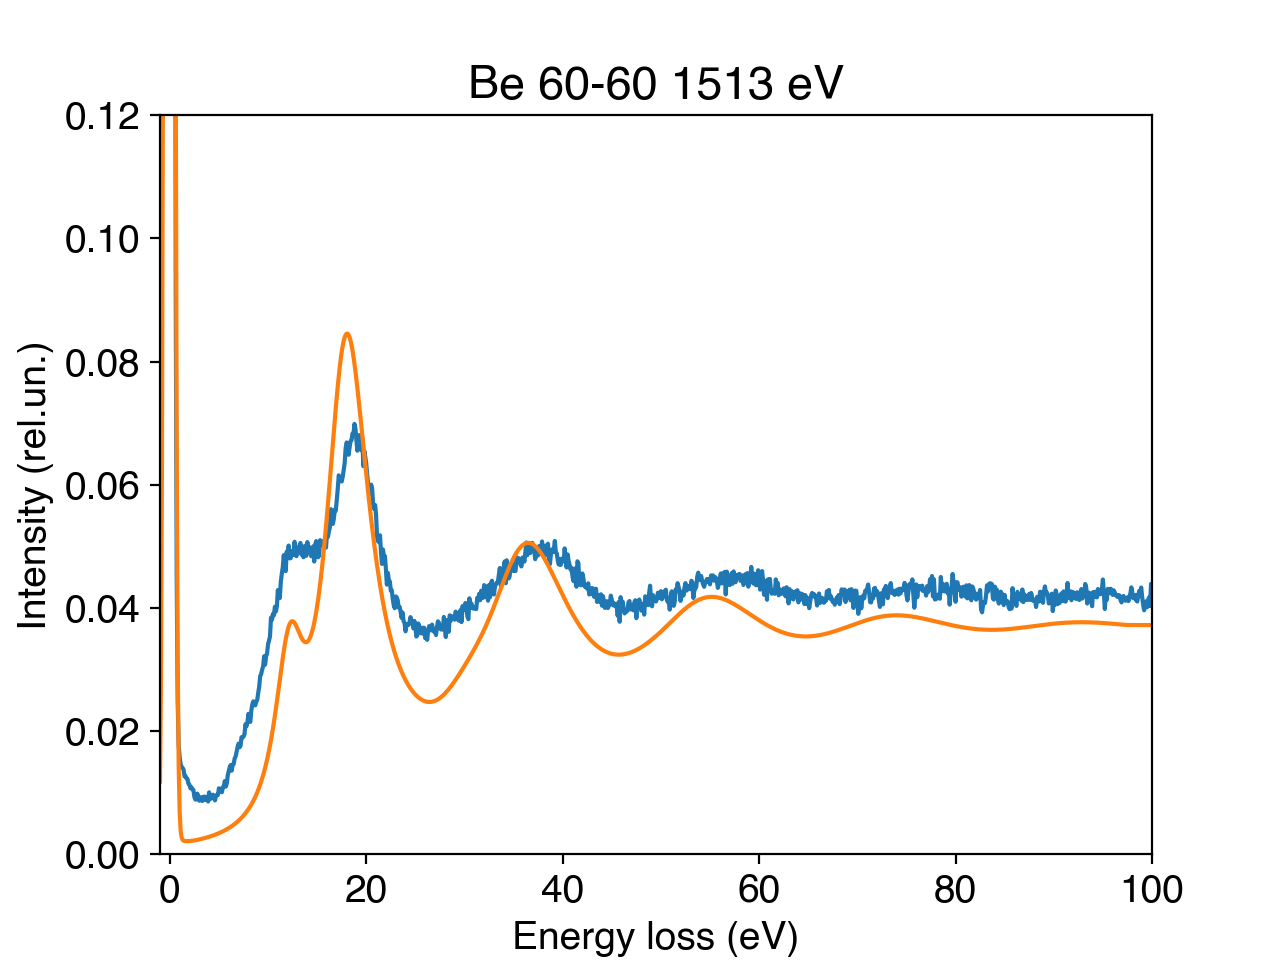

In [13]:
# be_drude.calculateEnergyDistribution(E0,n_in, 1.3, 0.1)

plt.figure()
plt.plot(d4[np.argmax(d3[:,1]),0] - d3[:,0], d3[:,1] / np.max(d3[:,1]))
plt.plot(be_drude.spectrum_E - be_drude.spectrum_E[np.argmax(be_drude.spectrum)], be_drude.spectrum / np.max(be_drude.spectrum))
plt.ylim(0, 0.12)
plt.xlim(-1,100)
plt.title(f'Be 60-60 {round(E0)} eV')
plt.xlabel('Energy loss (eV)')
plt.ylabel('Intensity (rel.un.)')
plt.show()

In [7]:
# A = [113.1, 44.6, 54.8, 184.9, 728.1, 65.7, 50.0, 74.7, 544.0]
# gamma = [0.2, 1.5, 3.3, 11.8, 71.0, 2.9, 3.9, 13.0, 51.9]
# omega = [0, 4.0, 7.3, 12.8, 18.9, 19.9, 28.9, 38.7, 64.3]

A = [176.571, 13.763, 67.055, 204.804, 561.997, 70.283, 70.122, 84.37, 250.138]
gamma = [0.142, 2.42, 6.258, 22.632, 40.382, 4.391, 6.725, 15.644, 28.832]
omega = [0.014, 5.496, 8.229, 10.93, 19.806, 21.602, 30.852, 41.31, 62.005]
alpha = 0.9939220142827853

M = 196.966570 # Molar weight
rho = 19.32 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = alpha)
composition = opt.Composition(['au'], [1])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0.01

au_drude_lorenz = opt.Material('au', oscillators, composition, eloss, q, xraypath)
au_drude_lorenz.Eg = 0
au_drude_lorenz.Ef = 9
au_drude_lorenz.atomic_density = rho * opt.N_Avogadro / M *1e-24
au_drude_lorenz.static_refractive_index = 1.25
au_drude_lorenz.Z = 79
au_drude_lorenz.use_henke_for_ne = True
au_drude_lorenz.use_KK_constraint = True

fsum = au_drude_lorenz.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(au_drude_lorenz.Z))

kksum = au_drude_lorenz.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 74.30682596390622
Z = 79
KKSum = 1.0165080499372405


Starting optimisation...
Electron density = 1.1626053549814301
found minimum after 1001 evaluations
minimum value =  2.4641696412656133e-05
result code =  5
Starting optimisation...
Electron density = 1.1626053549814301
found minimum after 1000 evaluations
minimum value =  2.5907382003864746e-05
result code =  5
FSum = 74.78580075191609
Z = 79
KKSum = 1.0142139896389892
A = [182.706, 27.912, 62.974, 219.145, 622.929, 76.427, 68.774, 85.088, 257.078]
gamma = [0.12, 8.617, 6.257, 25.607, 48.585, 4.448, 6.483, 15.826, 31.236]
omega = [0.042, 5.371, 7.556, 12.081, 18.339, 21.467, 30.7, 40.84, 63.105]
alpha = 0.9993917213170795


<IPython.core.display.Javascript object>


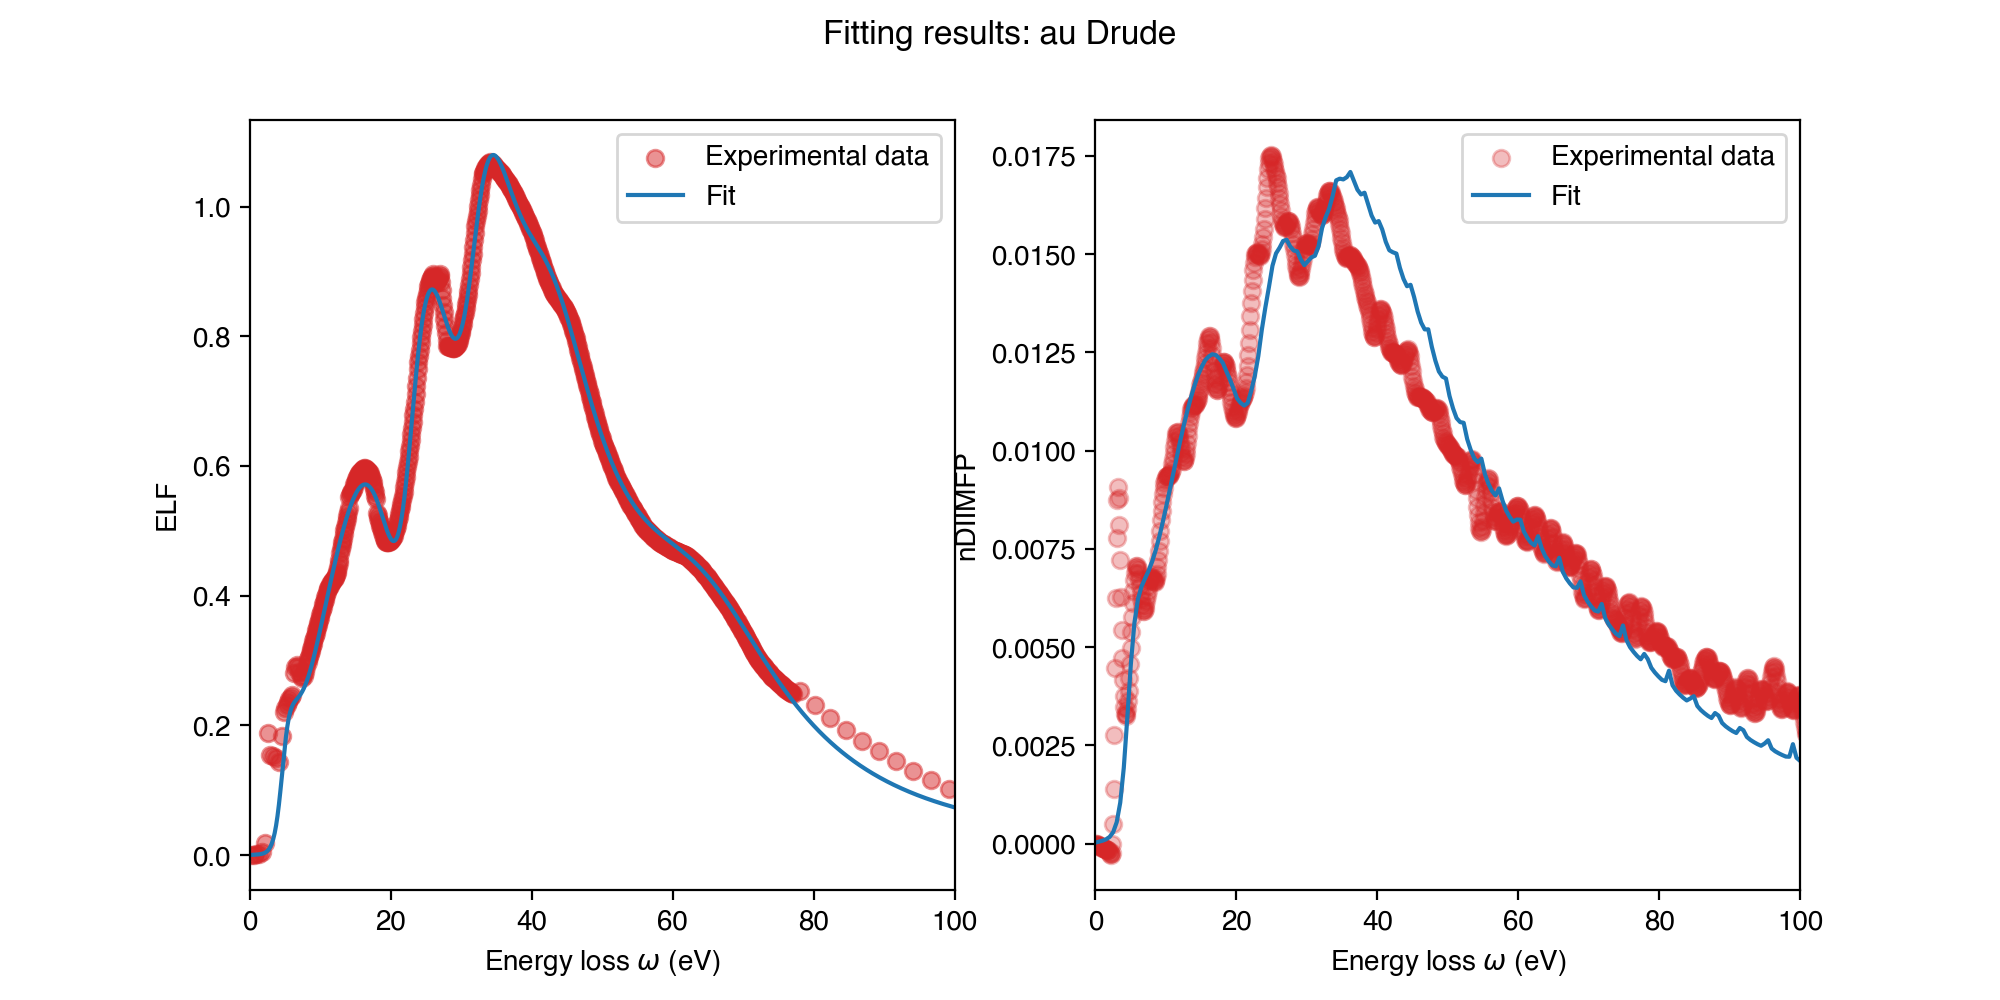

In [8]:
fd = np.loadtxt('/Users/olgaridzel/Research/PHYSDAT/opt/pal/au.diel')
x_exp_elf = fd[:,0]
y_exp_elf = fd[:,3]

exp_data = np.loadtxt('/Users/olgaridzel/Research/olga-optical-data/MATLAB/diimfp/wolga/au.wo', usecols = (0,1,2))
x_exp_ndiimfp = exp_data[:,0]
y_exp_ndiimfp = exp_data[:,1]

exp_data = opt.exp_data()
exp_data.x_elf = x_exp_elf
exp_data.y_elf = y_exp_elf
exp_data.x_ndiimfp = x_exp_ndiimfp
exp_data.y_ndiimfp = y_exp_ndiimfp

E0 = 3400
opt_ = opt.OptFit(au_drude_lorenz, exp_data, E0, n_q = 10)
result = opt_.runOptimisation(0.95, 0.05, maxeval = 1000, xtol_rel = 1e-4, isGlobal = True)
oscOptimised = opt_.vec2Struct(result)

opt_ = opt.OptFit(oscOptimised, exp_data, E0, n_q = 10)
result = opt_.runOptimisation(0.95, 0.05, maxeval = 1000, xtol_rel = 1e-4, isGlobal = False)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')
print(f'alpha = {oscOptimised.oscillators.alpha}')
# print()
# print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
# print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
# print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

# oscOptimised = al_drude
oscOptimised.calculateELF()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axs[0].scatter(exp_data.x_elf,exp_data.y_elf,label='Experimental data', c='tab:red', alpha = 0.5)
axs[0].plot(oscOptimised.eloss,oscOptimised.ELF,label='Fit')
axs[0].set_xlabel('Energy loss $\omega$ (eV)')
axs[0].set_ylabel('ELF')
axs[0].legend()
axs[0].set_xlim(0,100)

oscOptimised.calculateDIIMFP(1600)
axs[1].scatter(exp_data.x_ndiimfp,exp_data.y_ndiimfp,label='Experimental data', c='tab:red', alpha = 0.3)
axs[1].plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
axs[1].set_xlabel('Energy loss $\omega$ (eV)')
axs[1].set_ylabel('nDIIMFP')
axs[1].legend()
axs[1].set_xlim(0,100)

fig.suptitle(f'Fitting results: {oscOptimised.name} {oscOptimised.oscillators.model}')
plt.show()

Metal Ef = 9.0
rel_coef 1.009991315125679
Metal Ef = 9.0
rel_coef 1.009991315125679
Metal Ef = 9.0
rel_coef 1.009991315125679


<IPython.core.display.Javascript object>


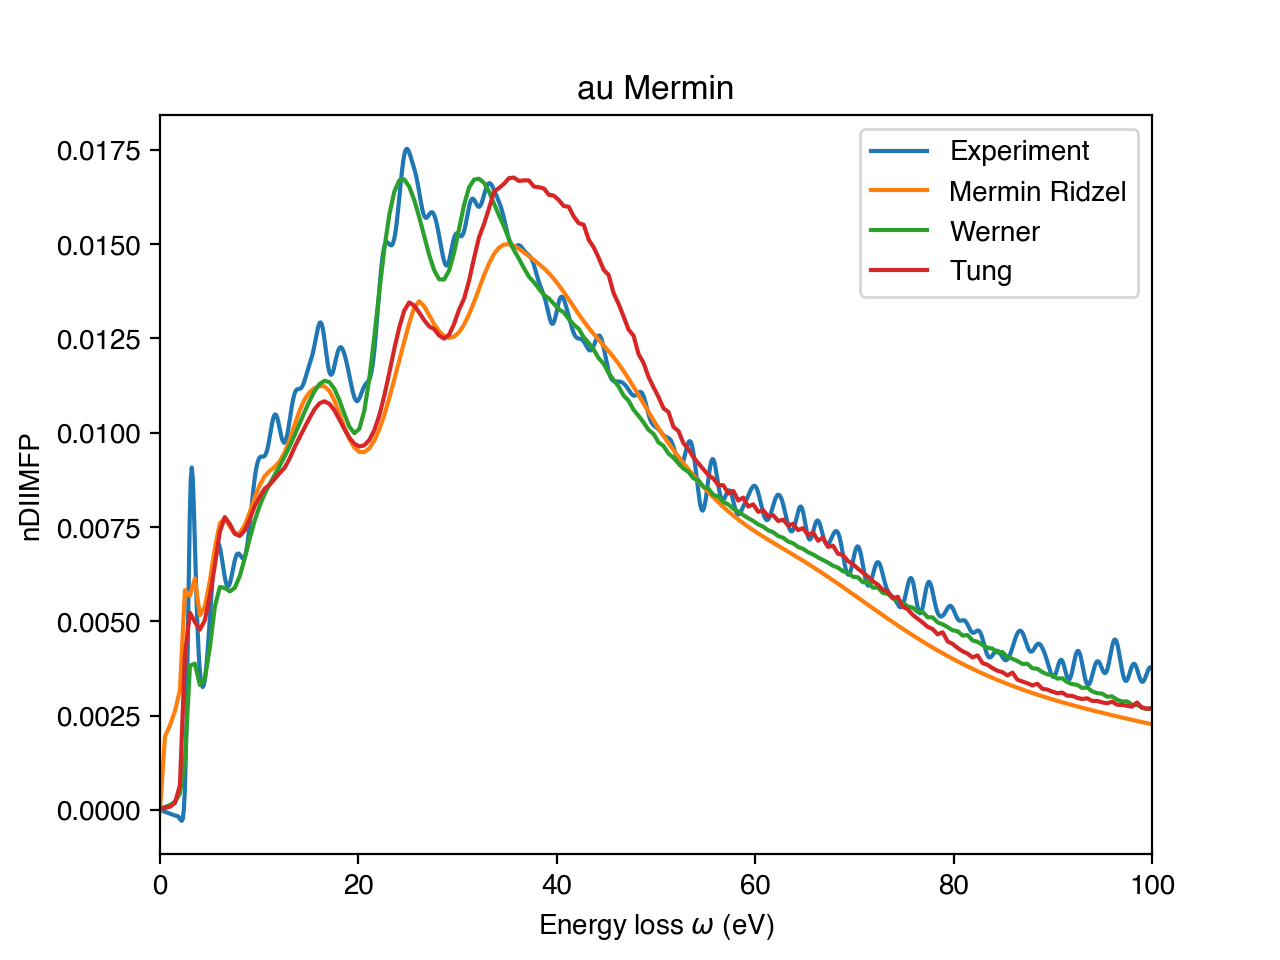

In [97]:
exp_data = np.loadtxt('/Users/olgaridzel/Research/olga-optical-data/MATLAB/diimfp/wolga/au.wo', usecols = (0,1,2))

au_m.calculateDIIMFP(3400, 0.5, 10)
au_drude.calculateDIIMFP(3400, 0.5, 12)
au_drude_lorenz.calculateDIIMFP(3400, 0.5, 12)

plt.figure()
plt.plot(exp_data[:,0], exp_data[:,1], label='Experiment')
plt.plot(au_m.DIIMFP_E,au_m.DIIMFP,label='Mermin Ridzel')
plt.plot(au_drude_lorenz.DIIMFP_E,au_drude_lorenz.DIIMFP,label='Werner')
plt.plot(au_drude.DIIMFP_E,au_drude.DIIMFP,label='Tung')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('nDIIMFP')
plt.title(f'{au_m.name} {au_m.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [ ]:
E = [5000, 8000, 16000, 32000]

plt.figure()

for energy in E:
    au_m.calculateDIIMFP(energy, 0.1, 13)

    fd = open(f'Au/au_{energy}_m.ndiimfp', 'w')

    for i in range(len(au_m.DIIMFP_E)):
        fd.write(f'{au_m.DIIMFP_E[i]:.4f} {au_m.DIIMFP[i]:.4f}\n')

    plt.plot(au_m.DIIMFP_E, au_m.DIIMFP, label=f'{energy/1000} keV')
    

fd.close()
plt.xlim(0, 100)
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('nDIIMFP')
plt.title(f'{au_m.name} {au_m.oscillators.model}')
plt.show()
plt.legend()

plt.savefig(f'Au/{au_m.name}_{au_m.oscillators.model}_ndiimfps_mermin.png', dpi=600)

<IPython.core.display.Javascript object>


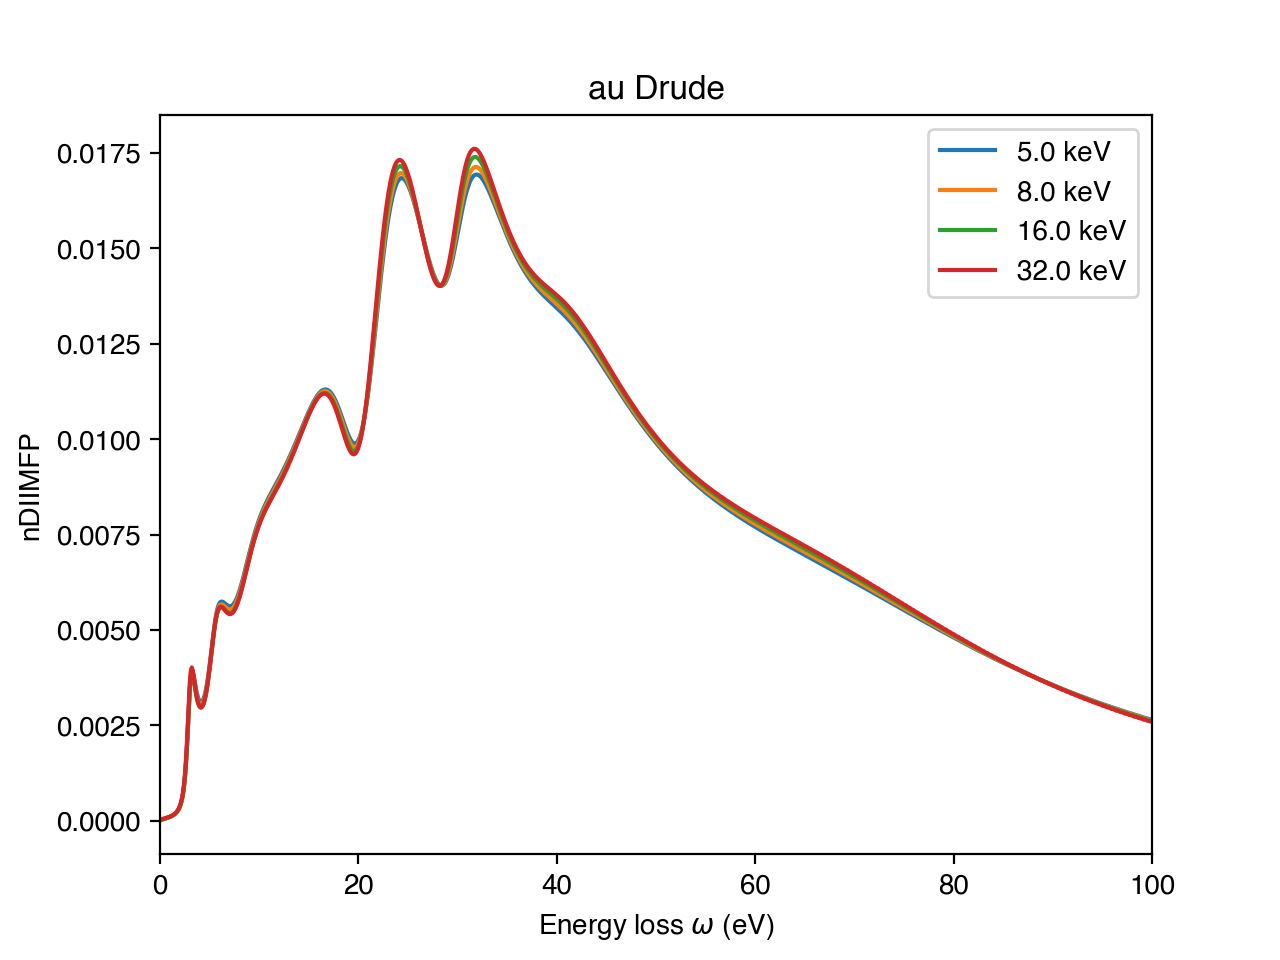

Metal Ef = 9.0
rel_coef 1.014700706979456
Metal Ef = 9.0
rel_coef 1.0235438188918027
Metal Ef = 9.0
rel_coef 1.0472073567140316
Metal Ef = 9.0
rel_coef 1.094882685113485


In [77]:
E = [5000, 8000, 16000, 32000]

plt.figure()

for energy in E:
    au_drude_lorenz.calculateDIIMFP(energy, 0.1, 15)

    fd = open(f'Au/au_{energy}.ndiimfp', 'w')

    for i in range(len(au_drude_lorenz.DIIMFP_E)):
        fd.write(f'{au_drude_lorenz.DIIMFP_E[i]:.4f} {au_drude_lorenz.DIIMFP[i]:.4f}\n')

    plt.plot(au_drude_lorenz.DIIMFP_E, au_drude_lorenz.DIIMFP, label=f'{energy/1000} keV')
    

fd.close()
plt.xlim(0, 100)
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('nDIIMFP')
plt.title(f'{au_drude_lorenz.name} {au_drude_lorenz.oscillators.model}')
plt.show()
plt.legend()

plt.savefig(f'Au/{au_drude_lorenz.name}_{au_drude_lorenz.oscillators.model}_ndiimfps_drude.png', dpi=600)

**Ag**

In [61]:
A = [0.05, 0.19, 0.05, 0.09, 0.11, 0.04, 0.07, 0.22, 0.07, 0.14, 0.04, 0.09, 0.01]
gamma = [0.16, 2.83, 4.1, 13.99, 6.45, 1.31, 11.06, 9.79, 9.91, 10.06, 15.08, 16.95, 13.19]
omega =[3.82, 7.91, 11.36, 56.91, 17.32, 4.96, 48.34, 26.26, 41.68, 35.01, 81.47, 70, 91.37]

M = 107.8682 # Molar weight
rho = 10.5 # g/cm3

oscillators = opt.Oscillators('Mermin', A, gamma, omega, alpha = 0)
composition = opt.Composition(['ag'], [1])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0.01

ag_m = opt.Material('ag', oscillators, composition, eloss, q, xraypath)
ag_m.Eg = 0
ag_m.Ef = 7.2
ag_m.atomic_density = rho * opt.N_Avogadro / M *1e-24
ag_m.static_refractive_index = 1.21
ag_m.Z = 47
ag_m.use_henke_for_ne = True
ag_m.use_KK_constraint = False
ag_m.use_kk_relation = False

fsum = ag_m.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(ag_m.Z))

kksum = ag_m.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 50.08906573833612
Z = 47
KKSum = 1.1746692268605372


In [156]:
A = [98.4, 103.9, 23.8, 318.3, 89.6, 63.5, 43.3, 313.3, 519.9]
gamma = [0.065, 93.8, 0.7, 22, 6.3, 3.3, 3.7, 16.7, 38.8]
omega = [0, 1, 4.9, 10.3, 13.2, 21.2, 30.2, 43, 65.7]
alpha = 1

M = 107.8682 # Molar weight
rho = 10.5 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = alpha)
composition = opt.Composition(['ag'], [1])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0.01

ag_drude_lorenz = opt.Material('ag', oscillators, composition, eloss, q, xraypath)
ag_drude_lorenz.Eg = 0
ag_drude_lorenz.Ef = 7.2
ag_drude_lorenz.atomic_density = rho * opt.N_Avogadro / M *1e-24
ag_drude_lorenz.static_refractive_index = 1.21
ag_drude_lorenz.Z = 47
ag_drude_lorenz.use_henke_for_ne = True
ag_drude_lorenz.use_KK_constraint = False
ag_drude_lorenz.use_kk_relation = False

fsum = ag_drude_lorenz.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(ag_drude_lorenz.Z))

kksum = ag_drude_lorenz.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 46.5000951209378
Z = 47
KKSum = 1.000952709868982


Starting optimisation...
Electron density = 0.9165540456881278
found minimum after 5000 evaluations
minimum value =  0.0004877631930081395
result code =  5
FSum = 44.649095672128695
Z = 47
KKSum = 1.0072001194800475
A = [83.241, 81.996, 31.262, 227.247, 104.982, 102.327, 67.771, 287.638, 277.36]
gamma = [0.066, 99.586, 0.431, 16.058, 6.427, 6.145, 6.868, 19.077, 24.626]
omega = [0.28, 0.942, 5.164, 13.205, 16.713, 23.264, 31.572, 42.11, 59.934]
alpha = 0.9315632021267268


<IPython.core.display.Javascript object>


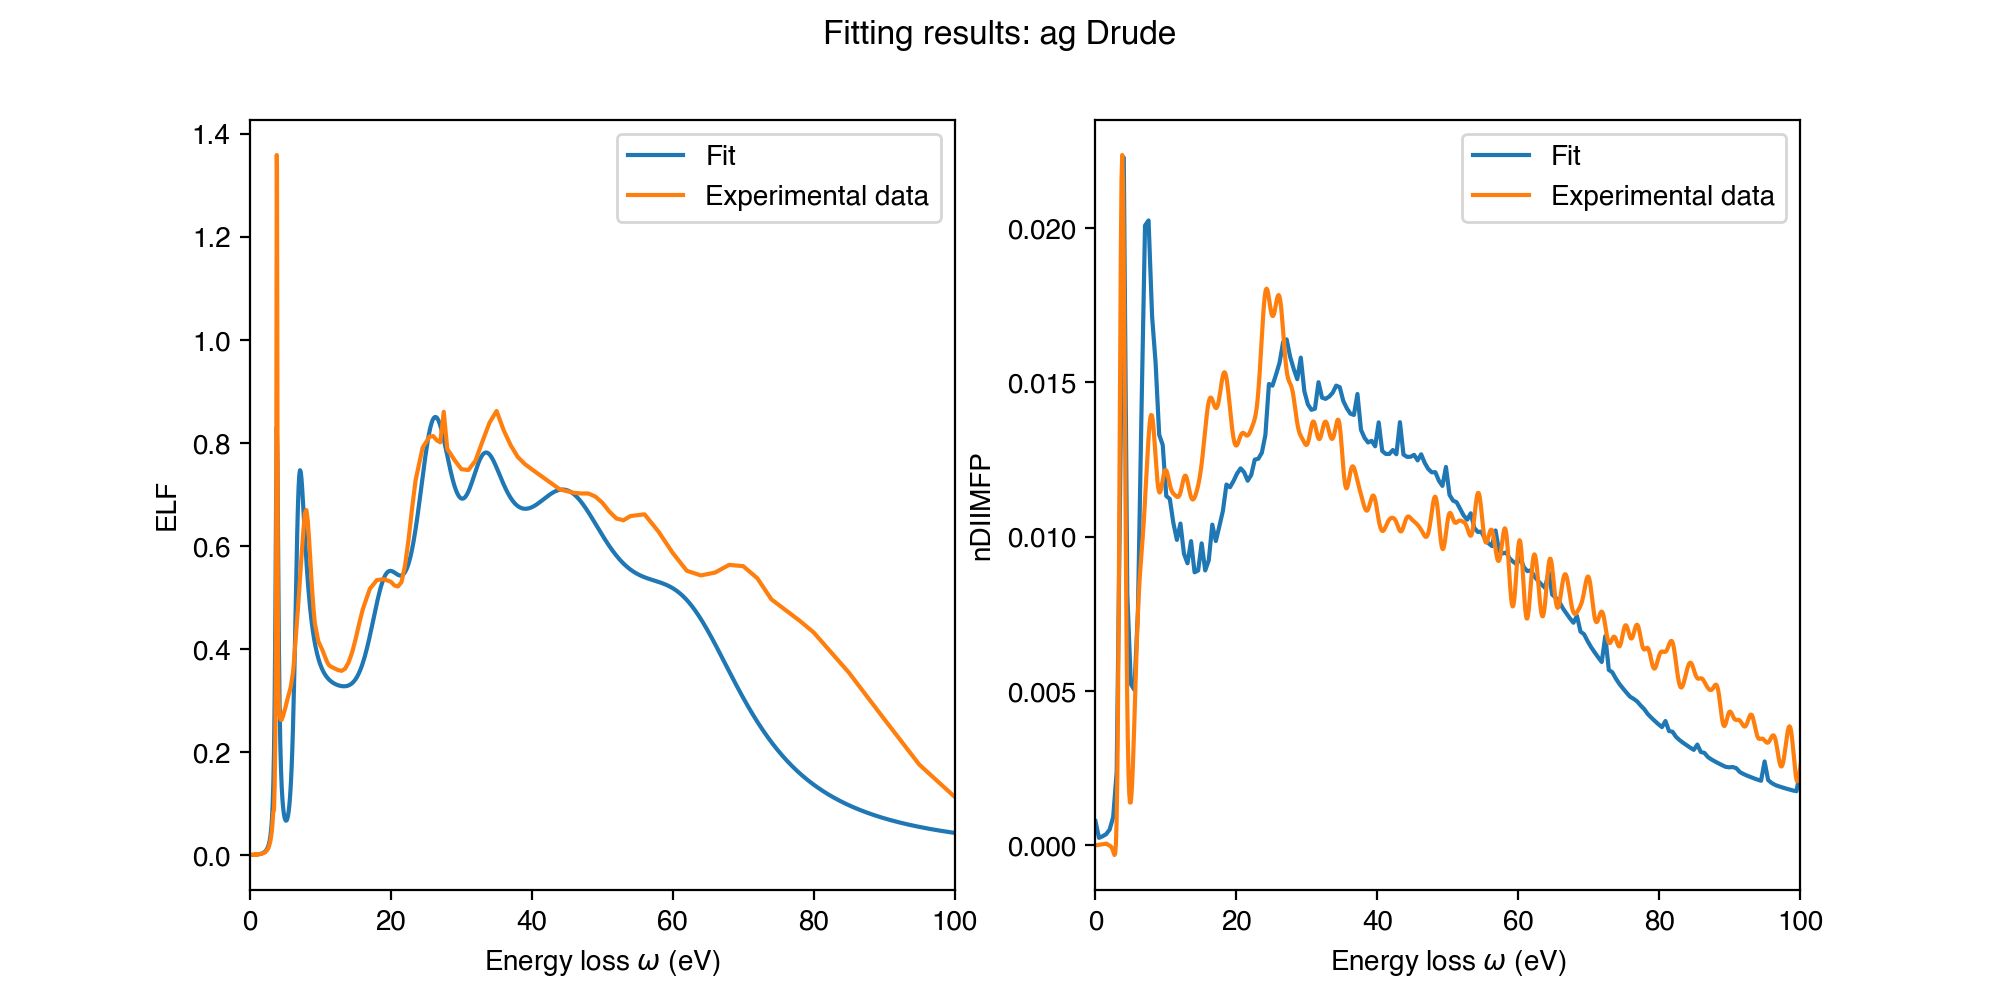

In [11]:
fd = np.loadtxt('/Users/olgaridzel/Research/PHYSDAT/opt/pal/ag.diel')
x_exp_elf = fd[:,0]
y_exp_elf = fd[:,3]

exp_data = np.loadtxt('/Users/olgaridzel/Research/olga-optical-data/MATLAB/diimfp/wolga/ag.wo', usecols = (0,1,2))
x_exp_ndiimfp = exp_data[:,0]
y_exp_ndiimfp = exp_data[:,1]

exp_data = opt.exp_data()
exp_data.x_elf = x_exp_elf
exp_data.y_elf = y_exp_elf
exp_data.x_ndiimfp = x_exp_ndiimfp
exp_data.y_ndiimfp = y_exp_ndiimfp

opt_ = opt.OptFit(ag_drude_lorenz, exp_data, 3400, n_q = 10)
result = opt_.runOptimisation(0.7, 0.3, maxeval = 5000, xtol_rel = 1e-4)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')
print(f'alpha = {oscOptimised.oscillators.alpha}')
# print()
# print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
# print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
# print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

oscOptimised.calculateELF()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axs[0].plot(oscOptimised.eloss,oscOptimised.ELF,label='Fit')
axs[0].plot(exp_data.x_elf,exp_data.y_elf,label='Experimental data')
axs[0].set_xlabel('Energy loss $\omega$ (eV)')
axs[0].set_ylabel('ELF')
axs[0].legend()
axs[0].set_xlim(0,100)

oscOptimised.calculateDIIMFP(3400)
axs[1].plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
axs[1].plot(exp_data.x_ndiimfp,exp_data.y_ndiimfp,label='Experimental data')
axs[1].set_xlabel('Energy loss $\omega$ (eV)')
axs[1].set_ylabel('nDIIMFP')
axs[1].legend()
axs[1].set_xlim(0,100)

fig.suptitle(f'Fitting results: {oscOptimised.name} {oscOptimised.oscillators.model}')
plt.show()

Metal Ef = 7.2
rel_coef 1.009991315125679
Metal Ef = 7.2
rel_coef 1.009991315125679


<IPython.core.display.Javascript object>


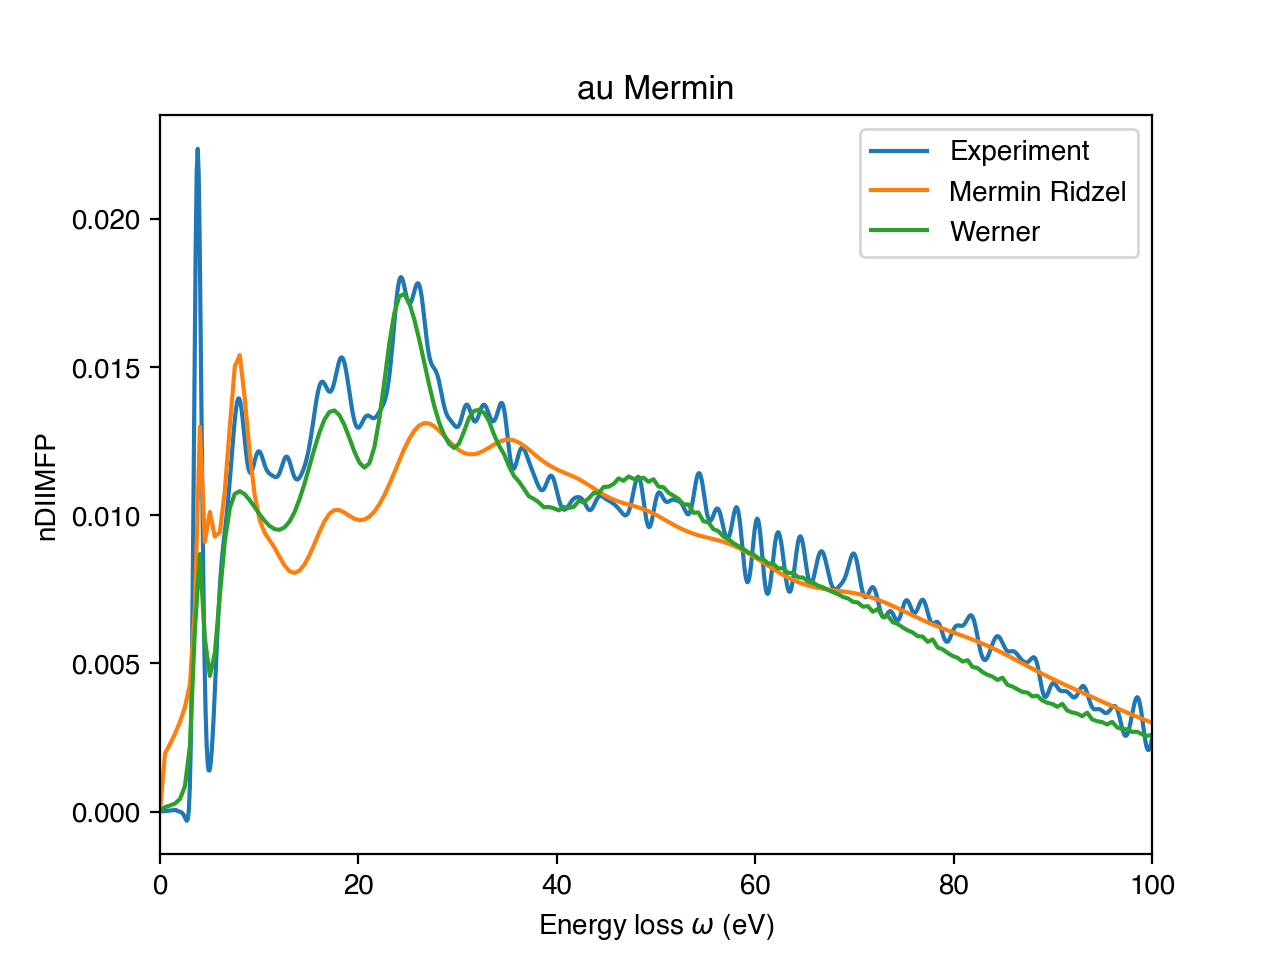

In [92]:
exp_data = np.loadtxt('/Users/olgaridzel/Research/olga-optical-data/MATLAB/diimfp/wolga/ag.wo', usecols = (0,1,2))

ag_m.calculateDIIMFP(3400, 0.5, 10)
# ag_drude.calculateDIIMFP(3400, 0.5, 12)
ag_drude_lorenz.calculateDIIMFP(3400, 0.5, 12)

plt.figure()
plt.plot(exp_data[:,0], exp_data[:,1], label='Experiment')
plt.plot(ag_m.DIIMFP_E,ag_m.DIIMFP,label='Mermin Ridzel')
plt.plot(ag_drude_lorenz.DIIMFP_E,ag_drude_lorenz.DIIMFP,label='Werner')
# plt.plot(ag_drude.DIIMFP_E,ag_drude.DIIMFP,label='Tung')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('nDIIMFP')
plt.title(f'{ag_m.name} {ag_m.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

<IPython.core.display.Javascript object>


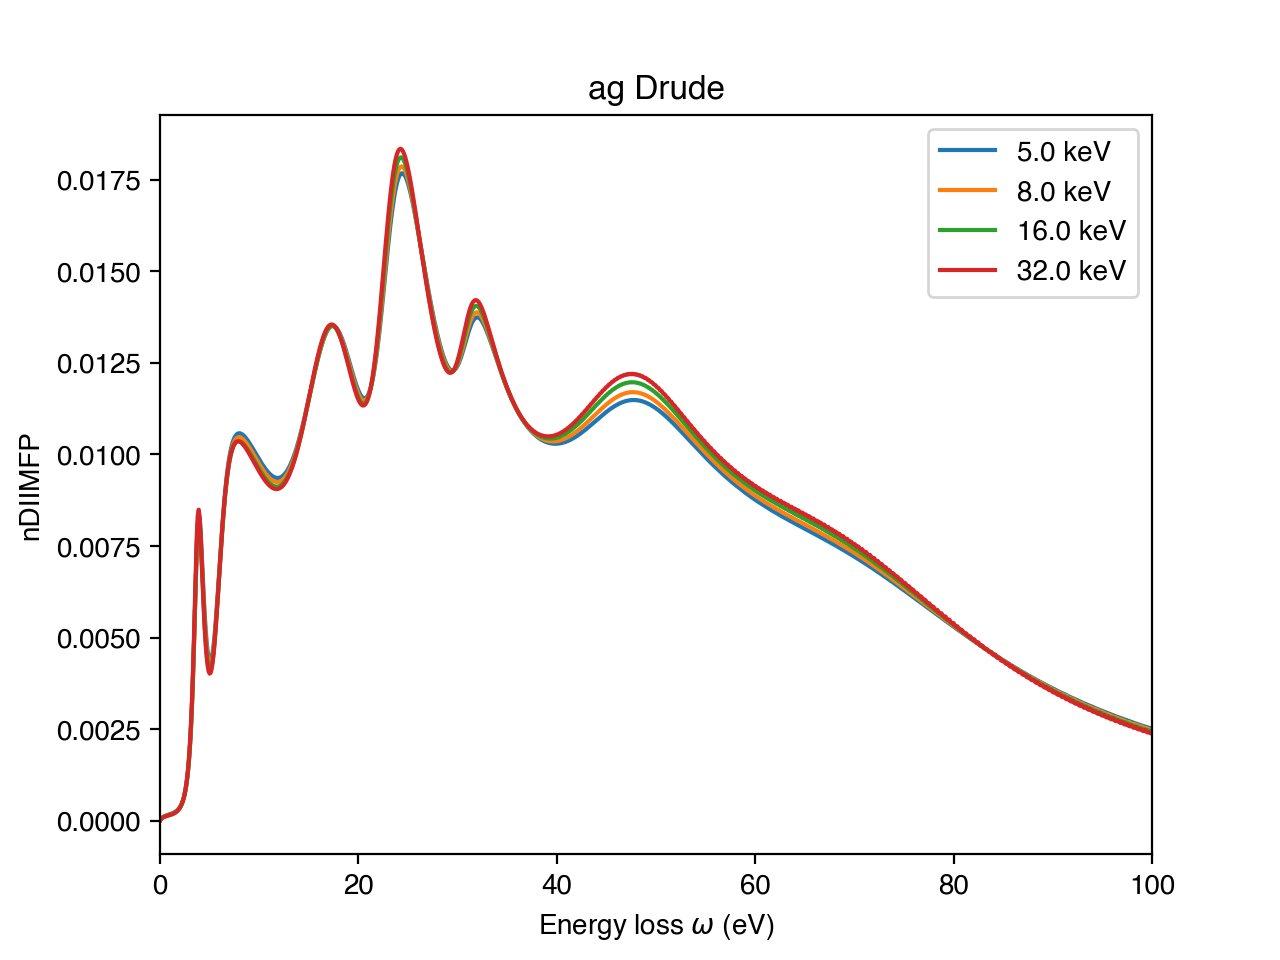

Metal Ef = 7.2
rel_coef 1.014700706979456
Metal Ef = 7.2
rel_coef 1.0235438188918027
Metal Ef = 7.2
rel_coef 1.0472073567140316
Metal Ef = 7.2
rel_coef 1.094882685113485


In [71]:
E = [5000, 8000, 16000, 32000]

plt.figure()

for energy in E:
    ag_drude_lorenz.calculateDIIMFP(energy, 0.1, 15)

    fd = open(f'Ag/ag_{energy}.ndiimfp', 'w')

    for i in range(len(ag_drude_lorenz.DIIMFP_E)):
        fd.write(f'{ag_drude_lorenz.DIIMFP_E[i]:.4f} {ag_drude_lorenz.DIIMFP[i]:.4f}\n')

    plt.plot(ag_drude_lorenz.DIIMFP_E, ag_drude_lorenz.DIIMFP, label=f'{energy/1000} keV')
    

fd.close()
plt.xlim(0, 100)
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('nDIIMFP')
plt.title(f'{ag_drude_lorenz.name} {ag_drude_lorenz.oscillators.model}')
plt.show()
plt.legend()

plt.savefig(f'Ag/{ag_drude_lorenz.name}_{ag_drude_lorenz.oscillators.model}_ndiimfps.png', dpi=600)

**W**

In [98]:
A = [0.01, 0.006, 0.006, 0.003, 0.007, 0.04, 0.06, 0.003, 0.09, 0.45, 0.04, 0.11, 0.25, 0.04]
gamma = [0.53, 0.76, 0.81, 0.57, 1.03, 2.33, 4.04, 0.14, 8.93, 6.58, 6.55, 8.14, 25.15, 194.48]
omega = [1.37, 2.14, 2.86, 3.92, 8.66, 10.07, 14.95, 0.87, 31.52, 25.48, 37.63, 42.68, 56.47, 188.48]

M = 183.85 # Molar weight
rho = 19.3 # g/cm3

oscillators = opt.Oscillators('Mermin', A, gamma, omega, alpha = 0)
composition = opt.Composition(['w'], [1])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0.01

w_m = opt.Material('w', oscillators, composition, eloss, q, xraypath)
w_m.Eg = 0
w_m.Ef = 10.1
w_m.atomic_density = rho * opt.N_Avogadro / M *1e-24
w_m.static_refractive_index = 1.24
w_m.Z = 74
w_m.use_henke_for_ne = True
w_m.use_KK_constraint = False
w_m.use_kk_relation = False

fsum = w_m.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(w_m.Z))

kksum = w_m.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 72.8554343356933
Z = 74
KKSum = 1.1216073496424785


In [9]:
A = [168, 54.3, 47.4, 25.5, 33.4, 37.9, 164.2, 125.1, 2.9, 98.4, 11.1, 221.9, 495.5]
gamma = [0.027, 0.5, 0.9, 0.5, 0.8, 2.5, 6, 7.7, 0.6, 3.1, 0.9, 8.9, 65.1]
omega = [0, 1, 2.7, 3.9, 5, 7, 11.1, 16.7, 22.9, 38.4, 41.1, 48.5, 80.2]

M = 183.85 # Molar weight
rho = 19.3 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 1)
composition = opt.Composition(['w'], [1])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

w_drude_lorenz = opt.Material('w', oscillators, composition, eloss, q, xraypath)
w_drude_lorenz.Eg = 0
w_drude_lorenz.Ef = 10.1
w_drude_lorenz.atomic_density = rho * opt.N_Avogadro / M *1e-24
w_drude_lorenz.static_refractive_index = 1.24
w_drude_lorenz.Z = 74
w_drude_lorenz.use_henke_for_ne = True
w_drude_lorenz.use_KK_constraint = False
w_drude_lorenz.use_kk_relation = False

fsum = w_drude_lorenz.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(w_drude_lorenz.Z))

kksum = w_drude_lorenz.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 70.91210998394797
Z = 74
KKSum = 1.0246782992399084


Starting optimisation...
Electron density = 1.0256563053138608
FSum = 71.50518227377997
Z = 74
KKSum = 1.0310309195795915
A = [149.616, 77.852, 62.169, 23.105, 45.223, 29.861, 255.427, 185.871, 3.037, 152.487, 16.379, 189.276, 222.64]
gamma = [0.029, 0.79, 1.489, 0.746, 1.459, 4.116, 10.289, 13.651, 1.188, 6.149, 1.532, 14.062, 90.509]
omega = [0.082, 1.01, 2.693, 3.859, 5.053, 6.145, 12.165, 13.886, 44.55, 37.571, 70.93, 49.874, 73.604]
alpha = 0.8650955388531374


<IPython.core.display.Javascript object>


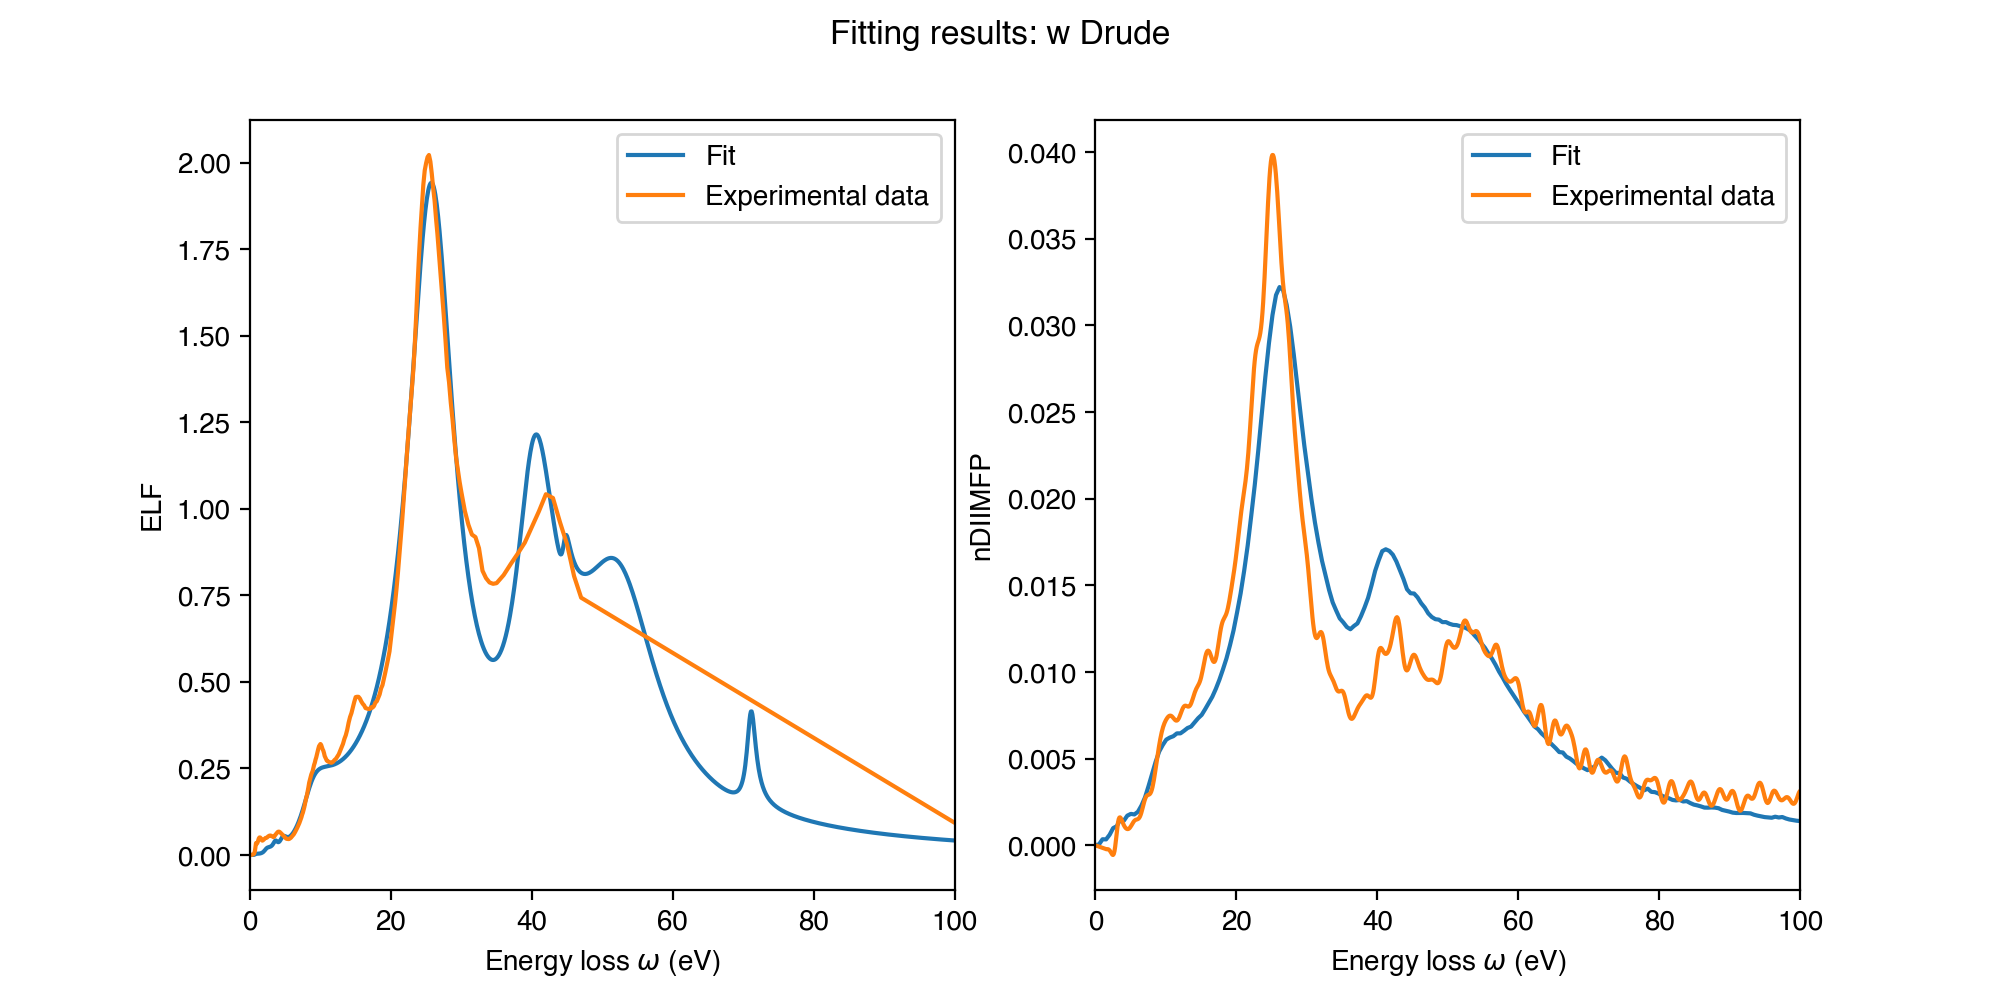

In [10]:
fd = np.loadtxt('/Users/olgaridzel/Research/PHYSDAT/opt/pal/w.diel')
x_exp_elf = fd[:,0]
y_exp_elf = fd[:,3]

exp_data = np.loadtxt('/Users/olgaridzel/Research/olga-optical-data/MATLAB/diimfp/wolga/w.wo', usecols = (0,1,2))
x_exp_ndiimfp = exp_data[:,0]
y_exp_ndiimfp = exp_data[:,1]

exp_data = opt.exp_data()
exp_data.x_elf = x_exp_elf
exp_data.y_elf = y_exp_elf
exp_data.x_ndiimfp = x_exp_ndiimfp
exp_data.y_ndiimfp = y_exp_ndiimfp

opt_ = opt.OptFit(w_drude_lorenz, exp_data, 3400, n_q = 10)
result = opt_.runOptimisation('elf+ndiimfp', maxeval = 1000, xtol_rel = 1e-4)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')
print(f'alpha = {oscOptimised.oscillators.alpha}')
# print()
# print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
# print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
# print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

# oscOptimised = al_drude
oscOptimised.calculateELF()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axs[0].plot(oscOptimised.eloss,oscOptimised.ELF,label='Fit')
axs[0].plot(exp_data.x_elf,exp_data.y_elf,label='Experimental data')
axs[0].set_xlabel('Energy loss $\omega$ (eV)')
axs[0].set_ylabel('ELF')
axs[0].legend()
axs[0].set_xlim(0,100)

oscOptimised.calculateDIIMFP(3400)
axs[1].plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
axs[1].plot(exp_data.x_ndiimfp,exp_data.y_ndiimfp,label='Experimental data')
axs[1].set_xlabel('Energy loss $\omega$ (eV)')
axs[1].set_ylabel('nDIIMFP')
axs[1].legend()
axs[1].set_xlim(0,100)

fig.suptitle(f'Fitting results: {oscOptimised.name} {oscOptimised.oscillators.model}')
plt.show()

Metal Ef = 10.1
rel_coef 1.009991315125679
Metal Ef = 10.1
rel_coef 1.009991315125679


<IPython.core.display.Javascript object>


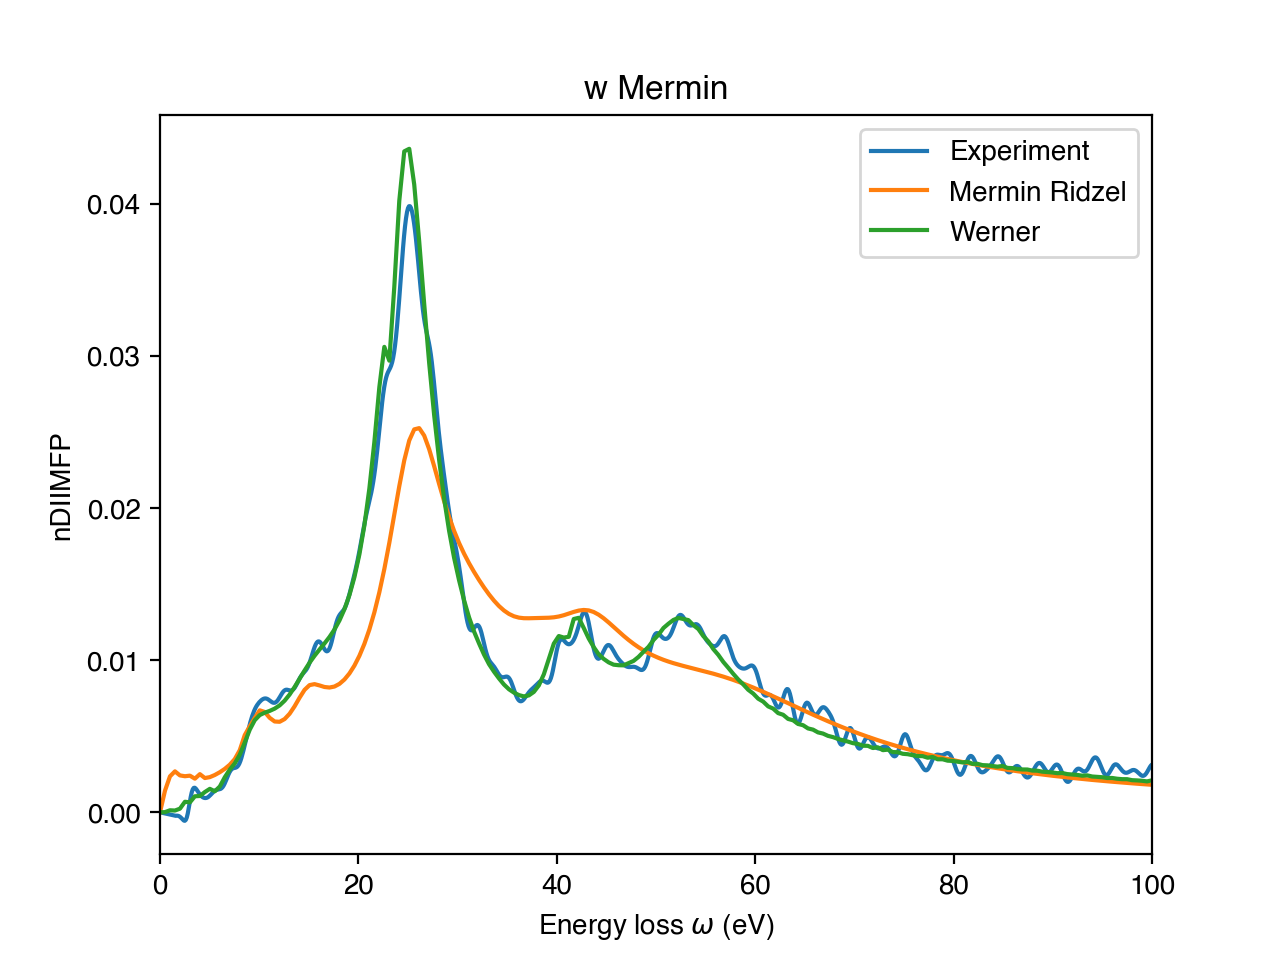

In [100]:
exp_data = np.loadtxt('/Users/olgaridzel/Research/olga-optical-data/MATLAB/diimfp/wolga/w.wo', usecols = (0,1,2))

w_m.calculateDIIMFP(3400, 0.5, 10)
# w_drude.calculateDIIMFP(3400, 0.5, 12)
w_drude_lorenz.calculateDIIMFP(3400, 0.5, 12)

plt.figure()
plt.plot(exp_data[:,0], exp_data[:,1], label="Experiment")
plt.plot(w_m.DIIMFP_E,w_m.DIIMFP,label='Mermin Ridzel')
plt.plot(w_drude_lorenz.DIIMFP_E,w_drude_lorenz.DIIMFP,label='Werner')
# plt.plot(w_drude.DIIMFP_E,w_drude.DIIMFP,label='Tung')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('nDIIMFP')
plt.title(f'{w_m.name} {w_m.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

<IPython.core.display.Javascript object>


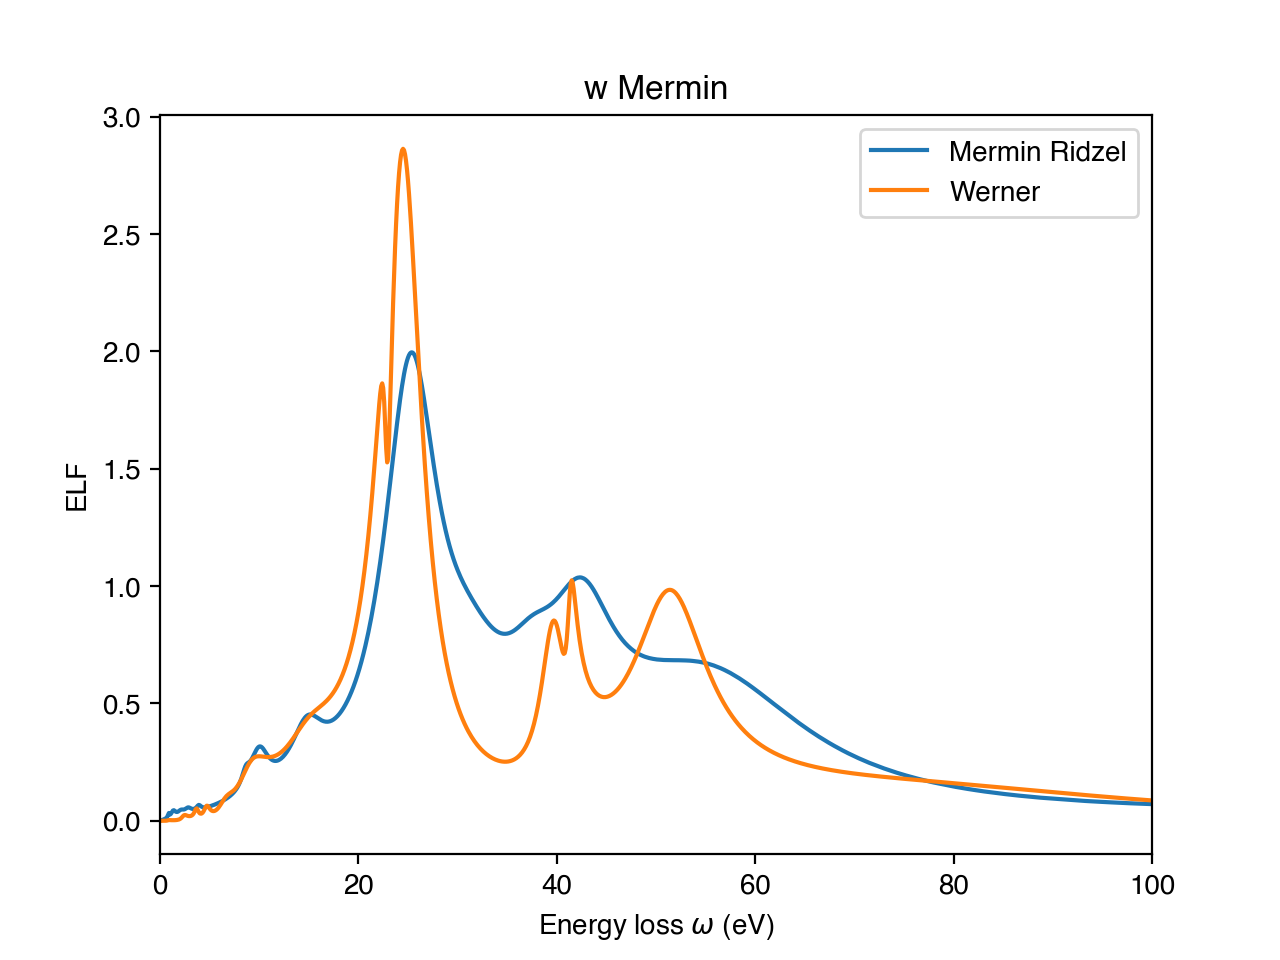

In [58]:
w_m.calculateELF()
w_drude_lorenz.calculateELF()

plt.figure()
plt.plot(w_m.eloss,w_m.ELF,label='Mermin Ridzel')
plt.plot(w_drude_lorenz.eloss,w_drude_lorenz.ELF,label='Werner')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{w_m.name} {w_m.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

<IPython.core.display.Javascript object>


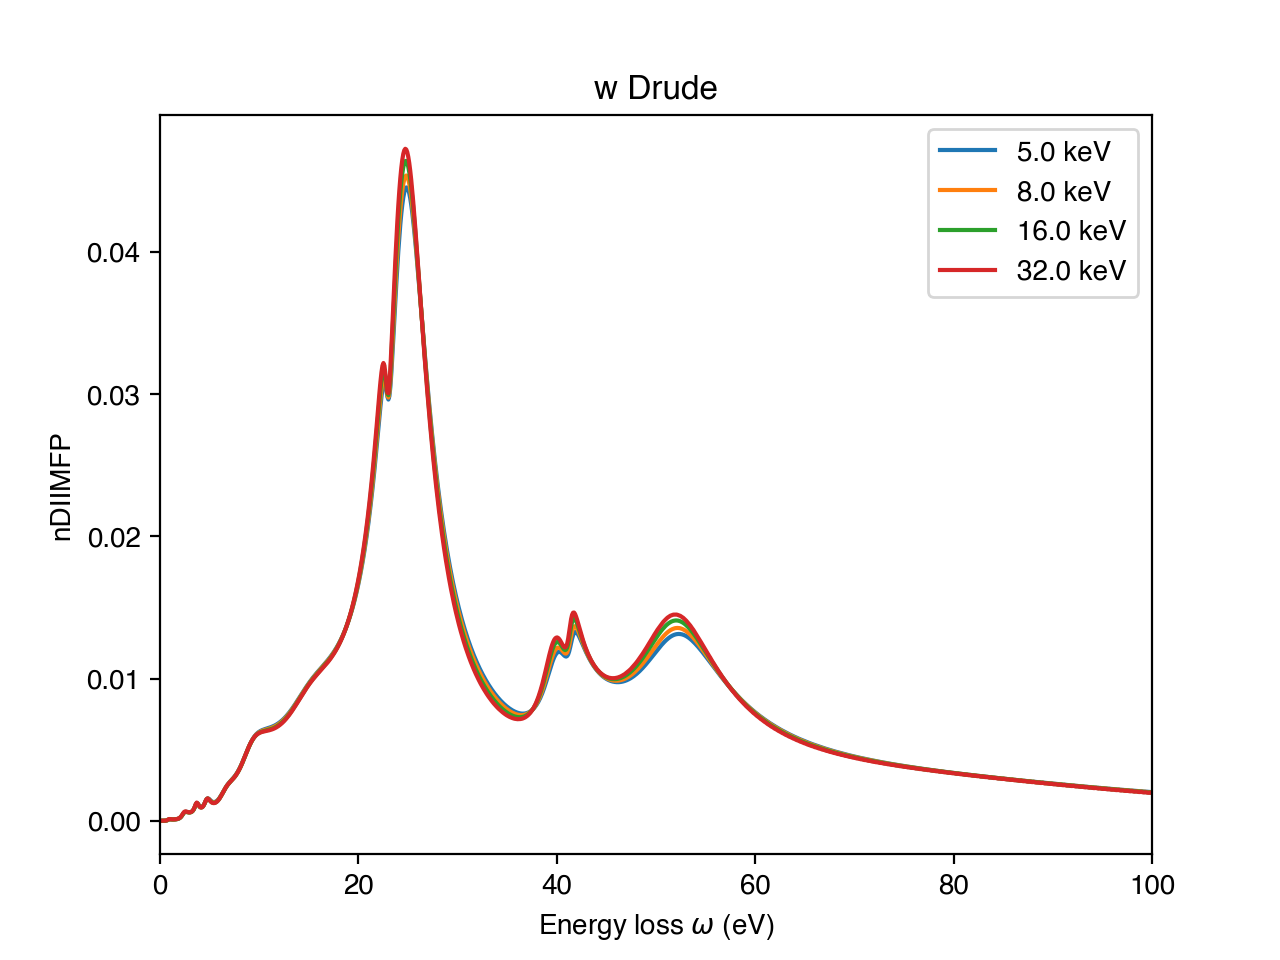

Metal Ef = 10.1
rel_coef 1.014700706979456
Metal Ef = 10.1
rel_coef 1.0235438188918027
Metal Ef = 10.1
rel_coef 1.0472073567140316
Metal Ef = 10.1
rel_coef 1.094882685113485


In [70]:
E = [5000, 8000, 16000, 32000]

plt.figure()

for energy in E:
    w_drude_lorenz.calculateDIIMFP(energy, 0.1, 15)

    fd = open(f'W/w_{energy}.ndiimfp', 'w')

    for i in range(len(w_drude_lorenz.DIIMFP_E)):
        fd.write(f'{w_drude_lorenz.DIIMFP_E[i]:.4f} {w_drude_lorenz.DIIMFP[i]:.4f}\n')

    plt.plot(w_drude_lorenz.DIIMFP_E, w_drude_lorenz.DIIMFP, label=f'{energy/1000} keV')
    

fd.close()
plt.xlim(0, 100)
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('nDIIMFP')
plt.title(f'{w_drude_lorenz.name} {w_drude_lorenz.oscillators.model}')
plt.show()
plt.legend()

plt.savefig(f'W/{w_drude_lorenz.name}_{w_drude_lorenz.oscillators.model}_ndiimfps.png', dpi=600)

In [9]:
x1 = [0, 2, 3]
x3 = [4, 5, 6]
x2 = 4

x = np.append( np.hstack((x1,x3)), x2)
print(x)

[0 2 3 4 5 6 4]


In [10]:
x[-1]

4